In [2]:
import numpy as np
import glob
import struct
import time
from net import LeNet5_modified
from tools import normalization
import matplotlib.pyplot as plt
import cv2
import os
import random

In [5]:
val_df=list()
f = open('../val.txt')
for line in f.readlines():
    #print(line)
    x = line.split()
    val_df.append(x)
f.close

valdata = np.zeros(shape=(1,3,32,32),dtype=int)
valdata_y = []
for i in range(len(val_df)):
    p1_1 = cv2.imread("../"+val_df[i][0])
    p1_2 = cv2.resize(p1_1, (32, 32))
    p1_2 = np.swapaxes(p1_2,0,2)
    p1_2 = np.swapaxes(p1_2,1,2)
    valdata = np.append(valdata,[p1_2], axis=0)
    valdata_y.append(int(val_df[i][1]))
valdata = valdata[1:]

print(valdata.shape)

valdata_y = np.array(valdata_y)
print(len(valdata_y))

(450, 3, 32, 32)
450


In [6]:
test_df=list()
f = open('../test.txt')
for line in f.readlines():
    #print(line)
    x = line.split()
    test_df.append(x)
f.close

testdata = np.zeros(shape=(1,3,32,32),dtype=int)
testdata_y = []
for i in range(len(test_df)):
    p1_1 = cv2.imread("../"+test_df[i][0])
    p1_2 = cv2.resize(p1_1, (32, 32))
    p1_2 = np.swapaxes(p1_2,0,2)
    p1_2 = np.swapaxes(p1_2,1,2)
    testdata = np.append(testdata,[p1_2], axis=0)
    testdata_y.append(int(test_df[i][1]))
testdata = testdata[1:]

print(testdata.shape)

testdata_y = np.array(testdata_y)
print(len(testdata_y))

(450, 3, 32, 32)
450


In [ ]:
train_df=list()
f = open('../train.txt')
for line in f.readlines():
    #print(line)
    x = line.split()
    train_df.append(x)
f.close

traindata = np.zeros(shape=(1,3,32,32),dtype=int)
traindata_y = []
for i in range(len(train_df)):
    p1_1 = cv2.imread("../"+train_df[i][0])
    p1_2 = cv2.resize(p1_1, (32, 32))
    p1_2 = np.swapaxes(p1_2,0,2)
    p1_2 = np.swapaxes(p1_2,1,2)
    p1_2 = p1_2.reshape(1, 3, 32, 32)
    traindata = np.concatenate((traindata, p1_2), axis=0)
    traindata_y.append(int(train_df[i][1]))
    if i %1000 ==0:
        print(time.strftime("%Y-%m-%d %H:%M:%S"),"finish:",i)
traindata = traindata[1:]

print(traindata.shape)

traindata_y = np.array(traindata_y)
print(len(traindata_y))

np.save("traindata32.npy",traindata)
np.save("traindata_y.npy",traindata_y)

In [19]:
traindata = np.load("traindata32.npy")
traindata_y = np.load("traindata_y.npy")

rl = list(range(len(traindata)))
random.shuffle(rl)

traindata = traindata[rl]
traindata_y = traindata_y[rl]

In [22]:
batch_size = 100  # 训练时的batch size
test_batch = 45  # 测试时的batch size
epoch = 10
learning_rate = 1e-4

ax = []  # 保存训练过程中x轴的数据（训练次数）用于画图
ay_loss = []  # 保存训练过程中y轴的数据（loss）用于画图
ay_acc = []
testx = [] # 保存测试过程中x轴的数据（训练次数）用于画图
testy_acc = []  # 保存测试过程中y轴的数据（loss）用于画图
plt.ion()   # 打开交互模式
iterations_num = 0 # 记录训练的迭代次数

net = LeNet5_modified.LeNet5_m()

2023-04-18 14:59:33   epoch:    1 , batch:   50 , avg_batch_acc:0.0194 , avg_batch_loss:0.0608 , lr:0.000100 


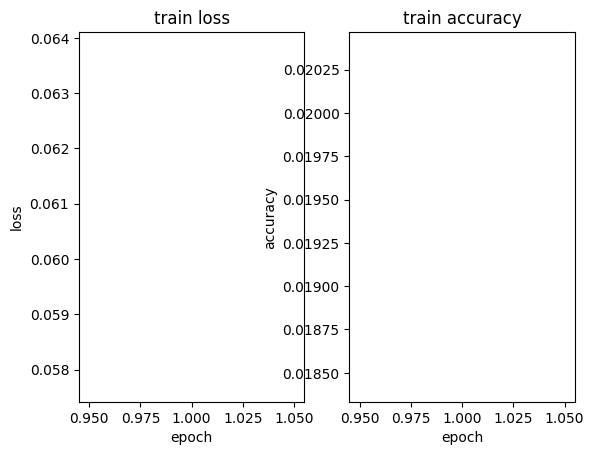

2023-04-18 14:59:51   epoch:    1 , batch:  100 , avg_batch_acc:0.0172 , avg_batch_loss:0.0489 , lr:0.000100 


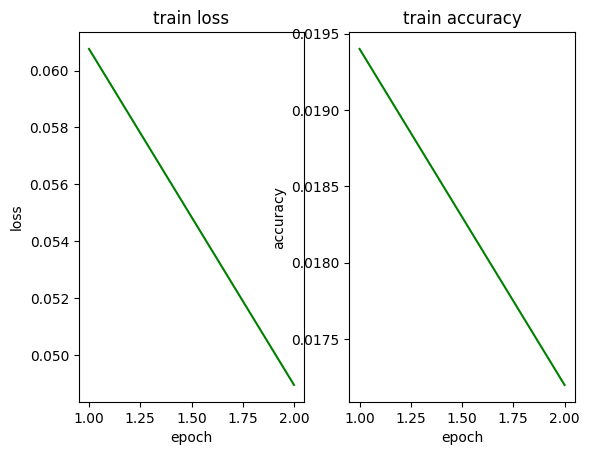

2023-04-18 15:00:09   epoch:    1 , batch:  150 , avg_batch_acc:0.0226 , avg_batch_loss:0.0461 , lr:0.000100 


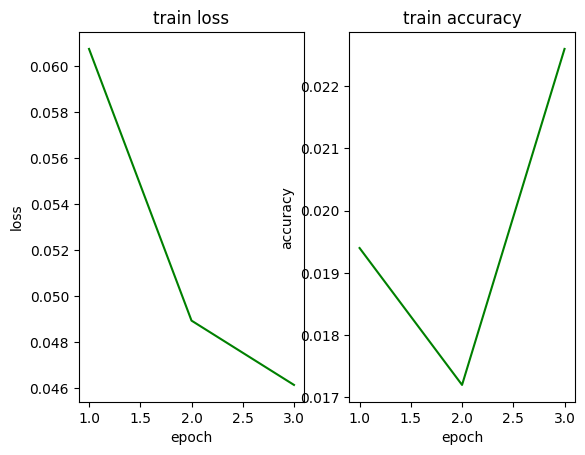

2023-04-18 15:00:27   epoch:    1 , batch:  200 , avg_batch_acc:0.0198 , avg_batch_loss:0.0453 , lr:0.000100 


2023-04-18 15:00:45   epoch:    1 , batch:  250 , avg_batch_acc:0.0248 , avg_batch_loss:0.0451 , lr:0.000100 


2023-04-18 15:01:03   epoch:    1 , batch:  300 , avg_batch_acc:0.0236 , avg_batch_loss:0.0447 , lr:0.000100 


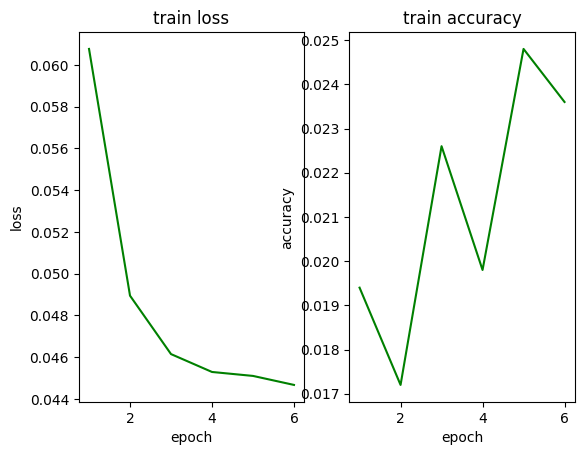

2023-04-18 15:01:21   epoch:    1 , batch:  350 , avg_batch_acc:0.0244 , avg_batch_loss:0.0445 , lr:0.000100 


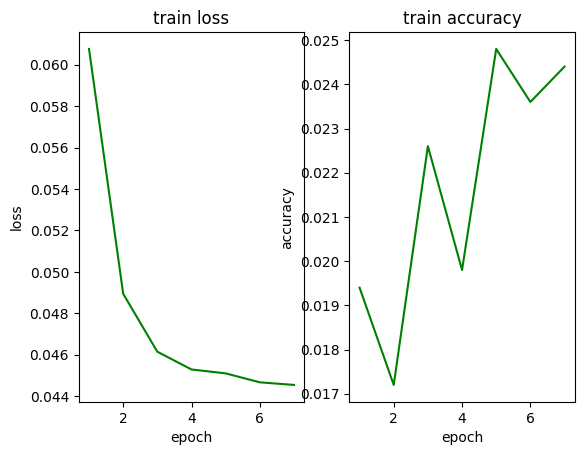

2023-04-18 15:01:39   epoch:    1 , batch:  400 , avg_batch_acc:0.0260 , avg_batch_loss:0.0444 , lr:0.000100 


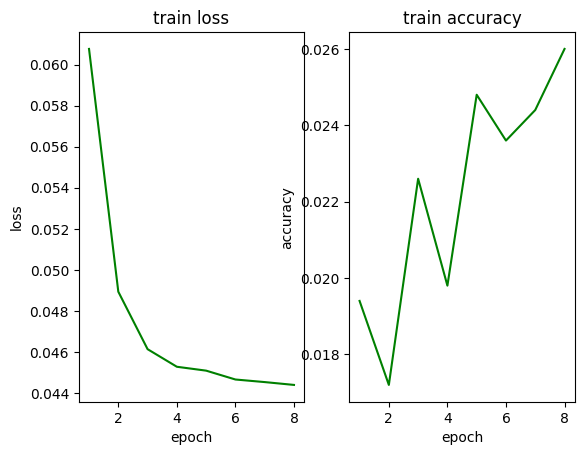

2023-04-18 15:01:56   epoch:    1 , batch:  450 , avg_batch_acc:0.0228 , avg_batch_loss:0.0442 , lr:0.000100 


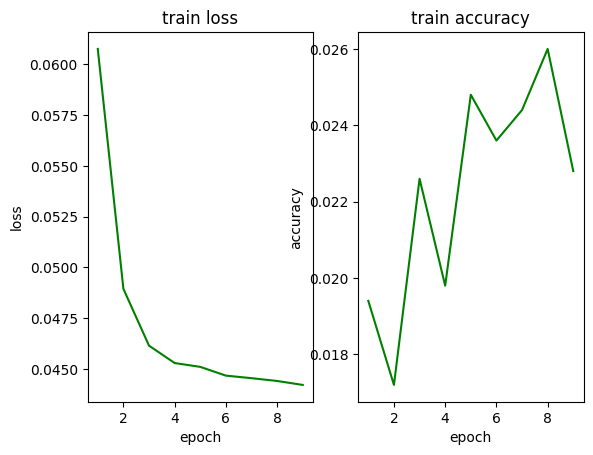

2023-04-18 15:02:13   epoch:    1 , batch:  500 , avg_batch_acc:0.0298 , avg_batch_loss:0.0442 , lr:0.000100 


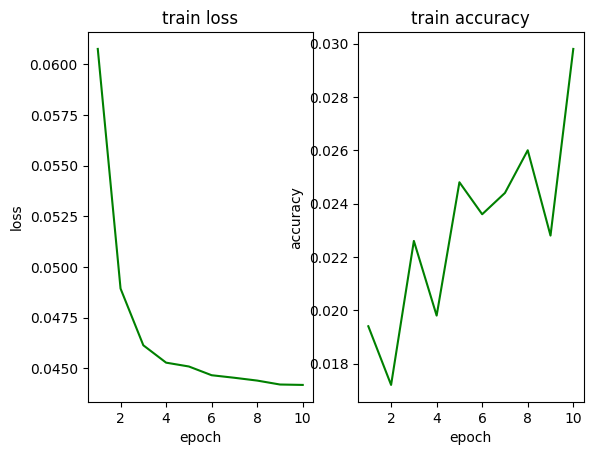

2023-04-18 15:02:30   epoch:    1 , batch:  550 , avg_batch_acc:0.0236 , avg_batch_loss:0.0441 , lr:0.000100 


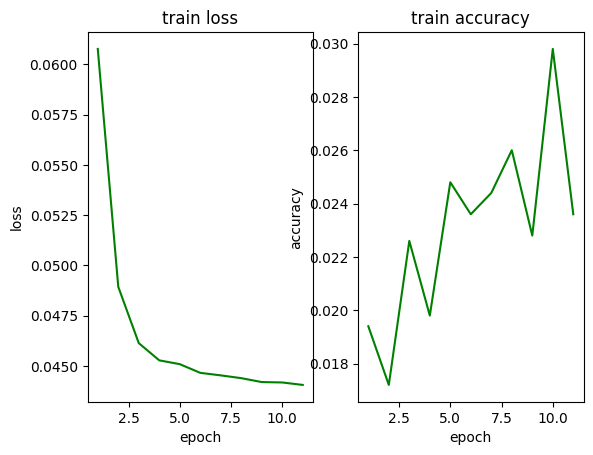

2023-04-18 15:02:48   epoch:    1 , batch:  600 , avg_batch_acc:0.0252 , avg_batch_loss:0.0440 , lr:0.000100 


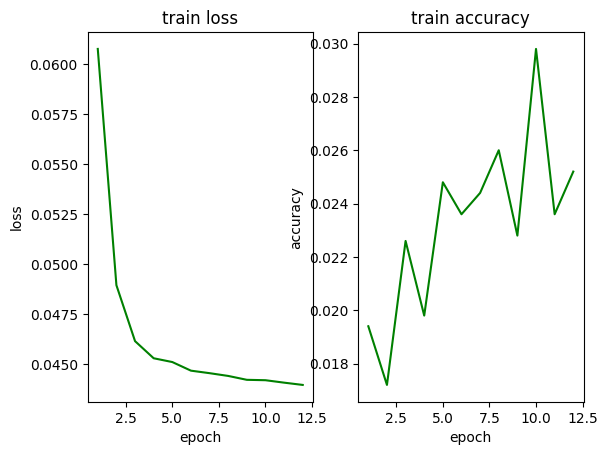

2023-04-18 15:02:59    **********epoch:    1 , avg_epoch_acc:0.0233 , avg_epoch_loss:0.0462 *************
------------test_set_acc:0.0178---------------


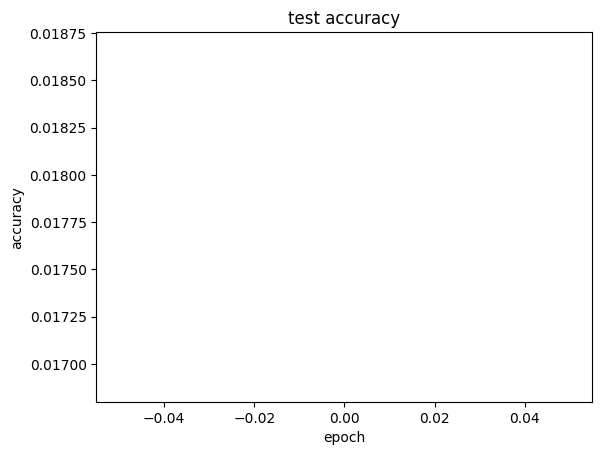

2023-04-18 15:03:17   epoch:    2 , batch:   50 , avg_batch_acc:0.0254 , avg_batch_loss:0.0441 , lr:0.000100 


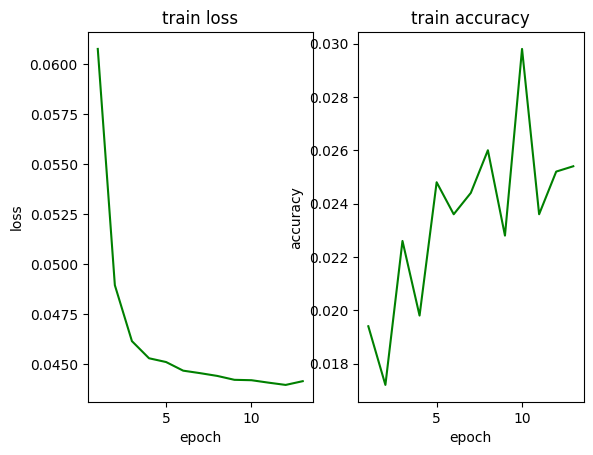

2023-04-18 15:03:34   epoch:    2 , batch:  100 , avg_batch_acc:0.0244 , avg_batch_loss:0.0440 , lr:0.000100 


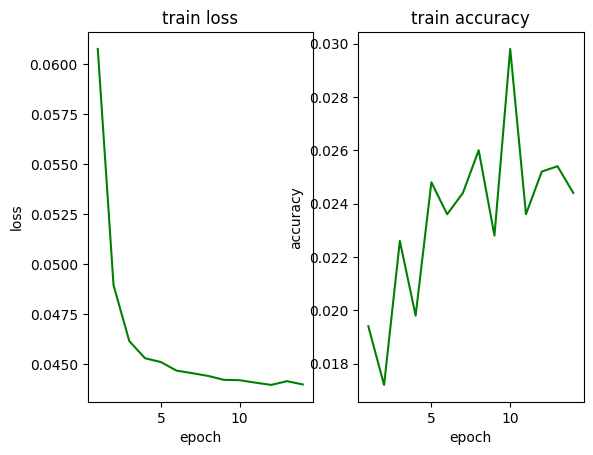

2023-04-18 15:03:51   epoch:    2 , batch:  150 , avg_batch_acc:0.0254 , avg_batch_loss:0.0436 , lr:0.000100 


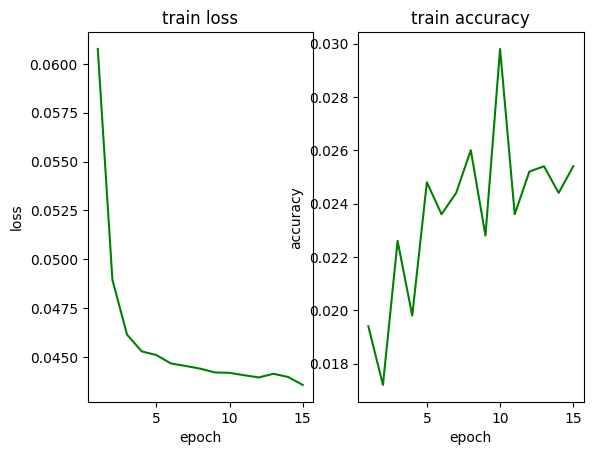

2023-04-18 15:04:08   epoch:    2 , batch:  200 , avg_batch_acc:0.0250 , avg_batch_loss:0.0435 , lr:0.000100 


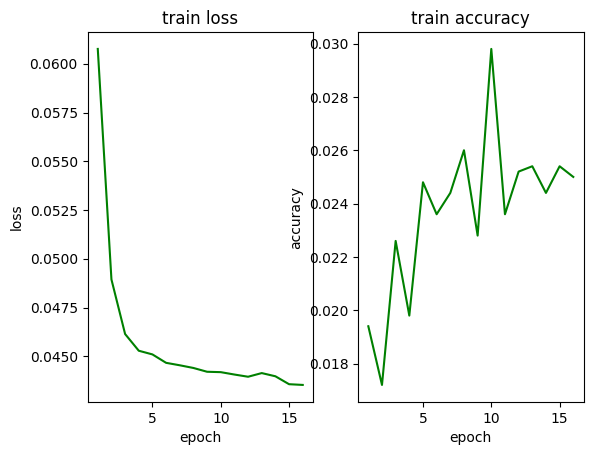

2023-04-18 15:04:25   epoch:    2 , batch:  250 , avg_batch_acc:0.0288 , avg_batch_loss:0.0435 , lr:0.000100 


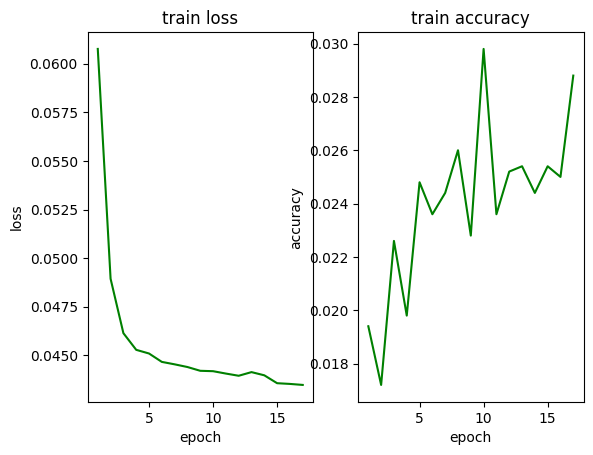

2023-04-18 15:04:42   epoch:    2 , batch:  300 , avg_batch_acc:0.0254 , avg_batch_loss:0.0433 , lr:0.000100 


2023-04-18 15:05:00   epoch:    2 , batch:  350 , avg_batch_acc:0.0248 , avg_batch_loss:0.0433 , lr:0.000100 


2023-04-18 15:05:17   epoch:    2 , batch:  400 , avg_batch_acc:0.0246 , avg_batch_loss:0.0433 , lr:0.000100 


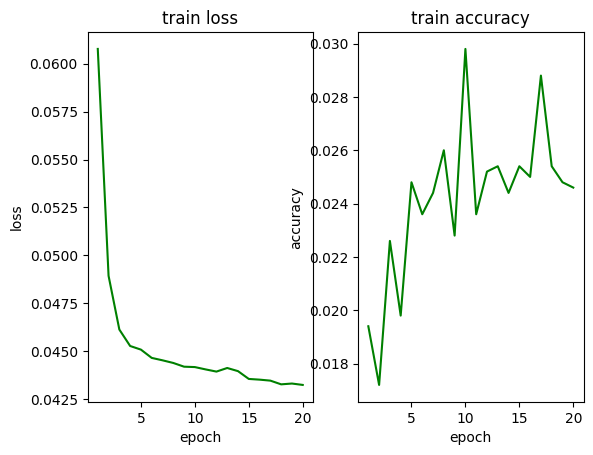

2023-04-18 15:05:34   epoch:    2 , batch:  450 , avg_batch_acc:0.0236 , avg_batch_loss:0.0432 , lr:0.000100 


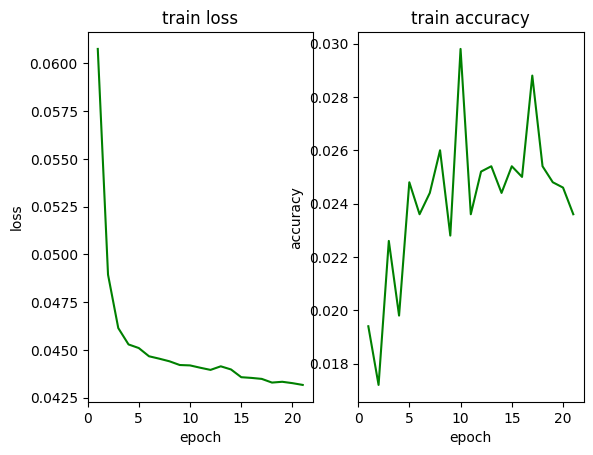

2023-04-18 15:05:51   epoch:    2 , batch:  500 , avg_batch_acc:0.0264 , avg_batch_loss:0.0432 , lr:0.000100 


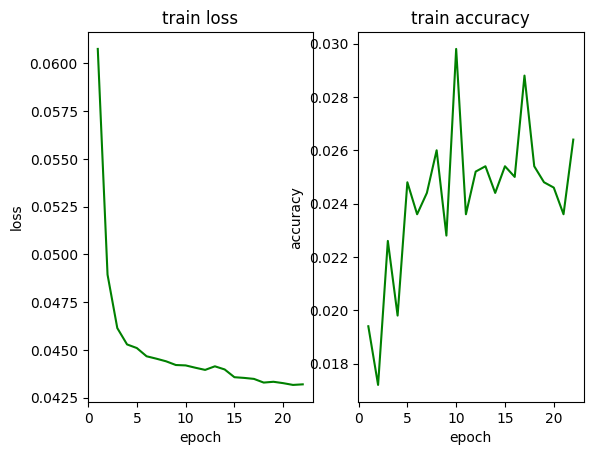

2023-04-18 15:06:09   epoch:    2 , batch:  550 , avg_batch_acc:0.0230 , avg_batch_loss:0.0432 , lr:0.000100 


2023-04-18 15:06:26   epoch:    2 , batch:  600 , avg_batch_acc:0.0256 , avg_batch_loss:0.0431 , lr:0.000100 


2023-04-18 15:06:37    **********epoch:    2 , avg_epoch_acc:0.0252 , avg_epoch_loss:0.0434 *************
------------test_set_acc:0.0178---------------


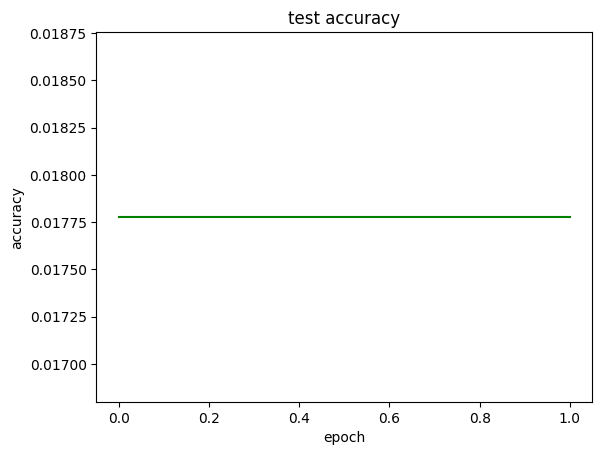

2023-04-18 15:06:55   epoch:    3 , batch:   50 , avg_batch_acc:0.0288 , avg_batch_loss:0.0433 , lr:0.000100 


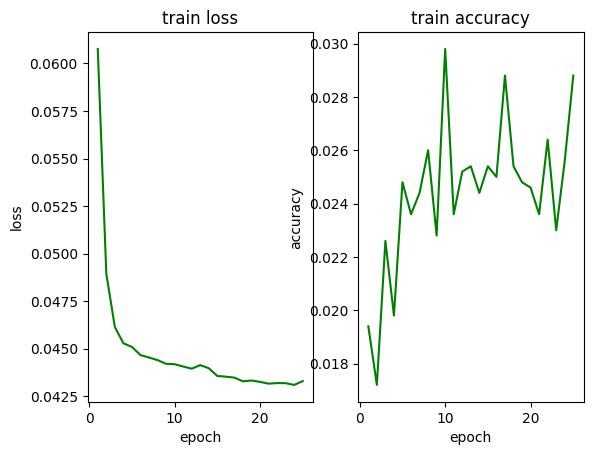

2023-04-18 15:07:12   epoch:    3 , batch:  100 , avg_batch_acc:0.0270 , avg_batch_loss:0.0433 , lr:0.000100 


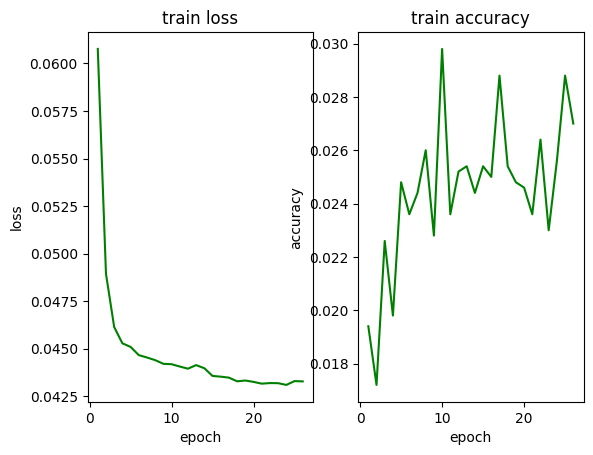

2023-04-18 15:07:29   epoch:    3 , batch:  150 , avg_batch_acc:0.0256 , avg_batch_loss:0.0430 , lr:0.000100 


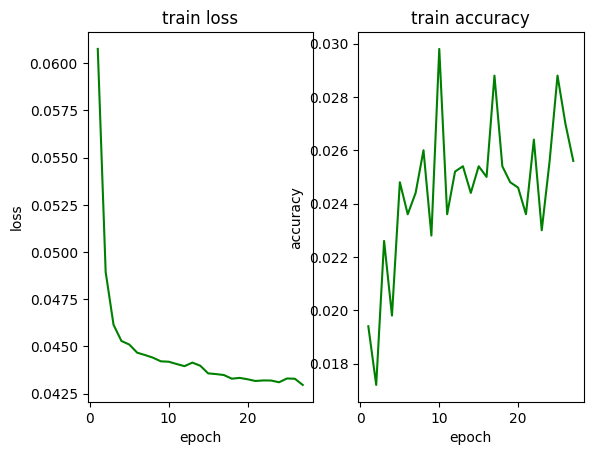

2023-04-18 15:07:46   epoch:    3 , batch:  200 , avg_batch_acc:0.0290 , avg_batch_loss:0.0428 , lr:0.000100 


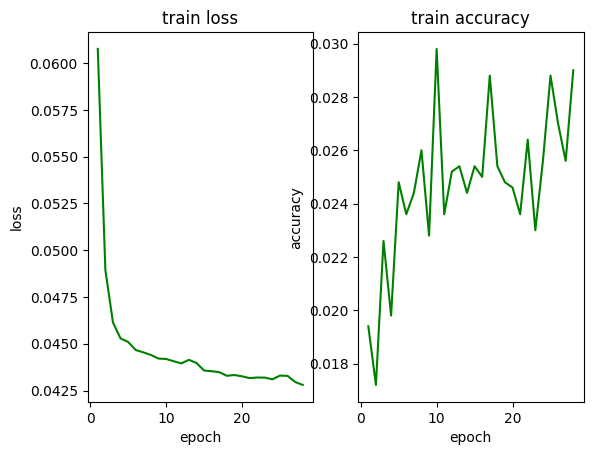

2023-04-18 15:08:03   epoch:    3 , batch:  250 , avg_batch_acc:0.0306 , avg_batch_loss:0.0429 , lr:0.000100 


2023-04-18 15:08:20   epoch:    3 , batch:  300 , avg_batch_acc:0.0318 , avg_batch_loss:0.0427 , lr:0.000100 


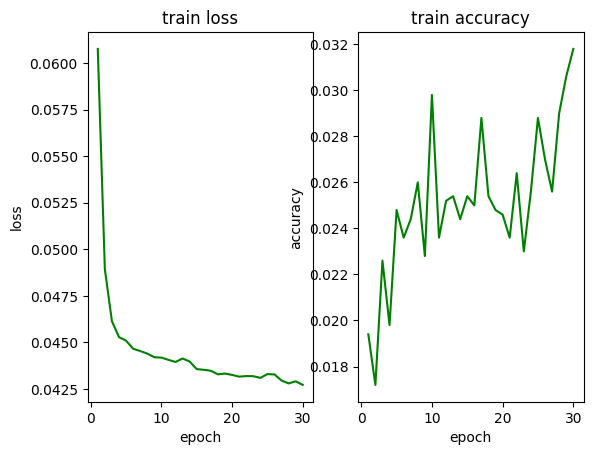

2023-04-18 15:08:37   epoch:    3 , batch:  350 , avg_batch_acc:0.0248 , avg_batch_loss:0.0431 , lr:0.000100 


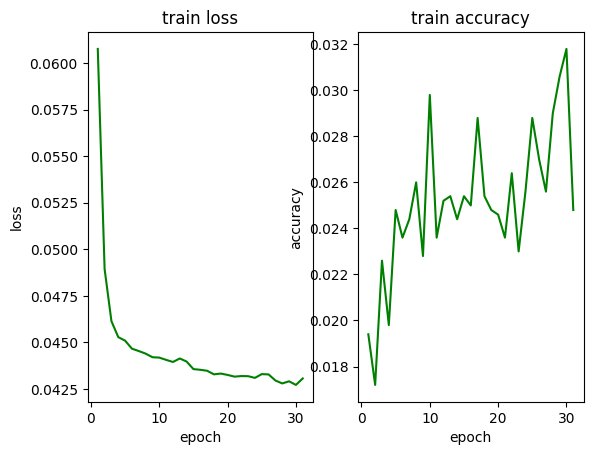

2023-04-18 15:08:53   epoch:    3 , batch:  400 , avg_batch_acc:0.0158 , avg_batch_loss:0.0435 , lr:0.000100 


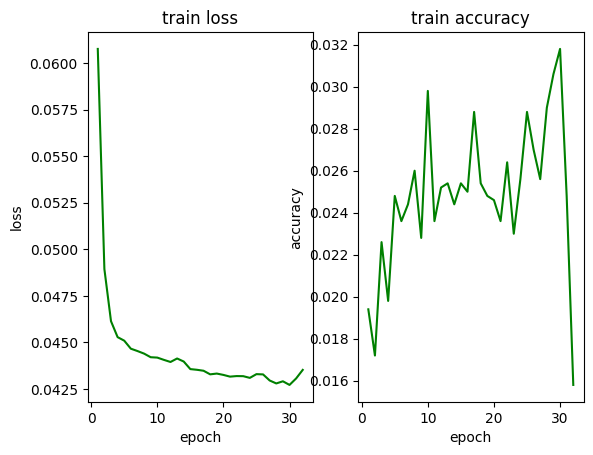

2023-04-18 15:09:10   epoch:    3 , batch:  450 , avg_batch_acc:0.0204 , avg_batch_loss:0.0434 , lr:0.000100 


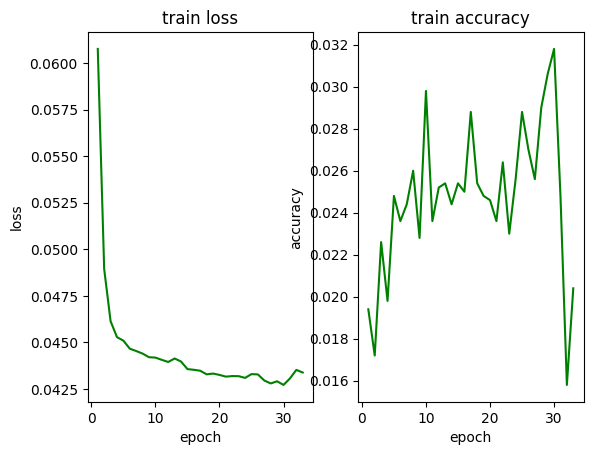

2023-04-18 15:09:27   epoch:    3 , batch:  500 , avg_batch_acc:0.0202 , avg_batch_loss:0.0432 , lr:0.000100 


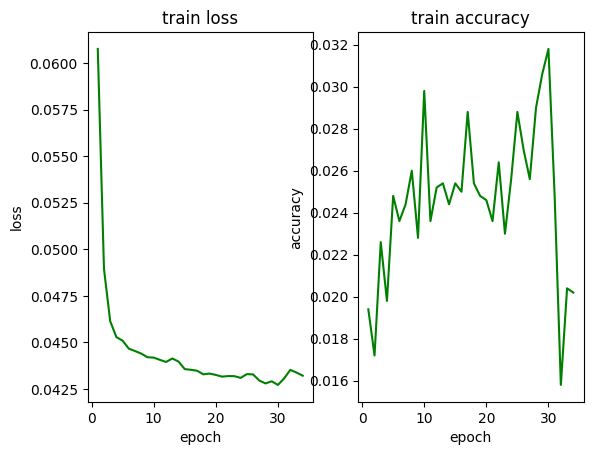

2023-04-18 15:09:44   epoch:    3 , batch:  550 , avg_batch_acc:0.0186 , avg_batch_loss:0.0432 , lr:0.000100 


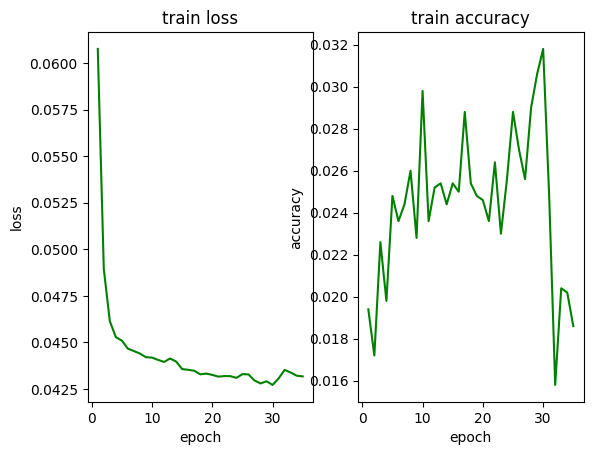

2023-04-18 15:10:01   epoch:    3 , batch:  600 , avg_batch_acc:0.0196 , avg_batch_loss:0.0430 , lr:0.000100 


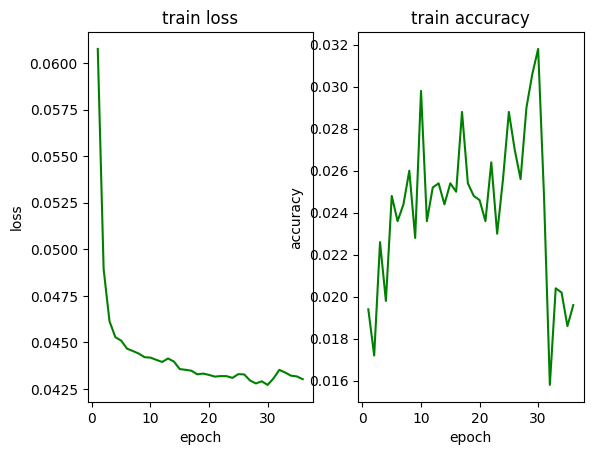

2023-04-18 15:10:12    **********epoch:    3 , avg_epoch_acc:0.0240 , avg_epoch_loss:0.0431 *************
------------test_set_acc:0.0111---------------


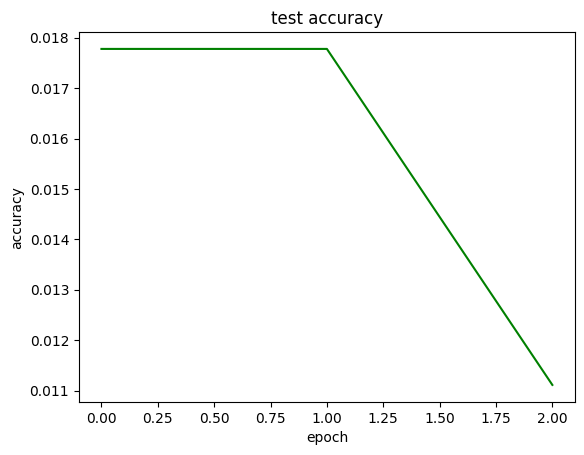

2023-04-18 15:10:30   epoch:    4 , batch:   50 , avg_batch_acc:0.0210 , avg_batch_loss:0.0433 , lr:0.000100 


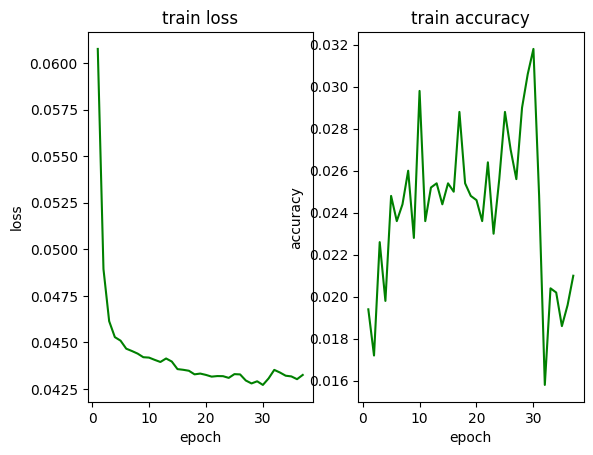

2023-04-18 15:10:47   epoch:    4 , batch:  100 , avg_batch_acc:0.0190 , avg_batch_loss:0.0434 , lr:0.000100 


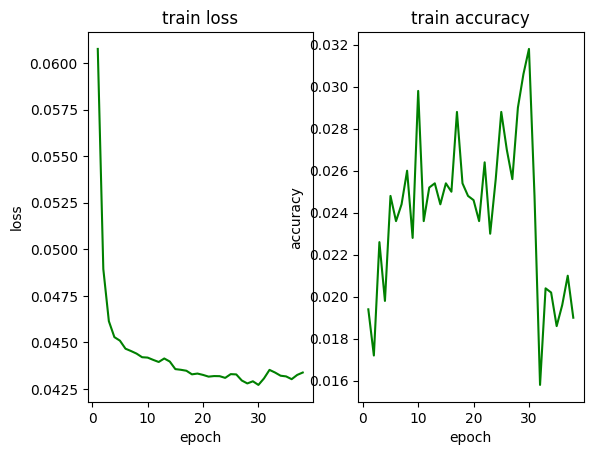

2023-04-18 15:11:04   epoch:    4 , batch:  150 , avg_batch_acc:0.0188 , avg_batch_loss:0.0429 , lr:0.000100 


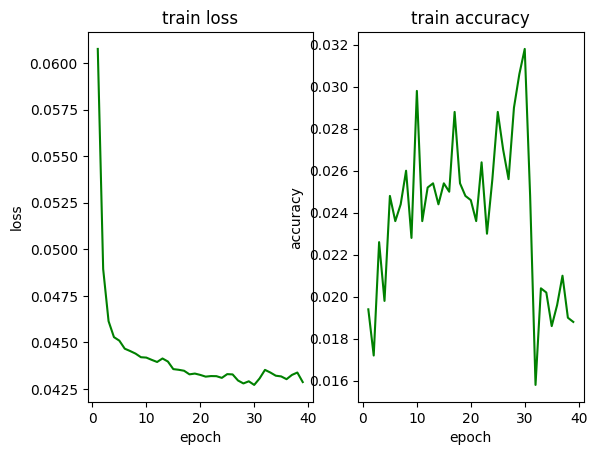

2023-04-18 15:11:21   epoch:    4 , batch:  200 , avg_batch_acc:0.0212 , avg_batch_loss:0.0428 , lr:0.000100 


2023-04-18 15:11:38   epoch:    4 , batch:  250 , avg_batch_acc:0.0242 , avg_batch_loss:0.0429 , lr:0.000100 


2023-04-18 15:11:55   epoch:    4 , batch:  300 , avg_batch_acc:0.0250 , avg_batch_loss:0.0427 , lr:0.000100 


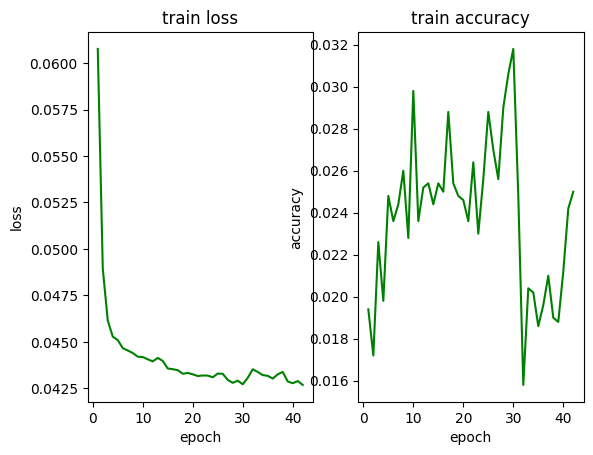

2023-04-18 15:12:12   epoch:    4 , batch:  350 , avg_batch_acc:0.0212 , avg_batch_loss:0.0427 , lr:0.000100 


2023-04-18 15:12:29   epoch:    4 , batch:  400 , avg_batch_acc:0.0208 , avg_batch_loss:0.0428 , lr:0.000100 


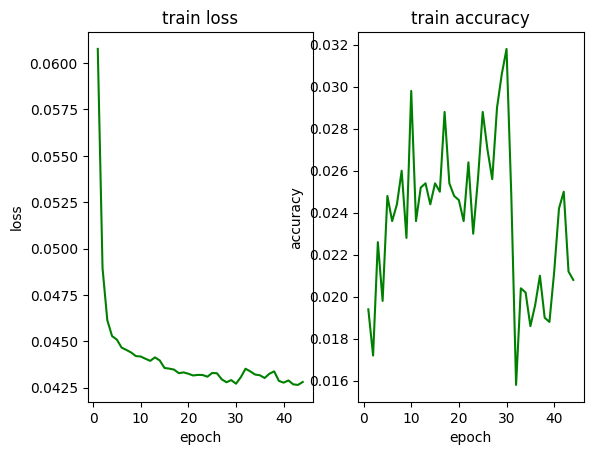

2023-04-18 15:12:46   epoch:    4 , batch:  450 , avg_batch_acc:0.0214 , avg_batch_loss:0.0426 , lr:0.000100 


2023-04-18 15:13:03   epoch:    4 , batch:  500 , avg_batch_acc:0.0232 , avg_batch_loss:0.0425 , lr:0.000100 


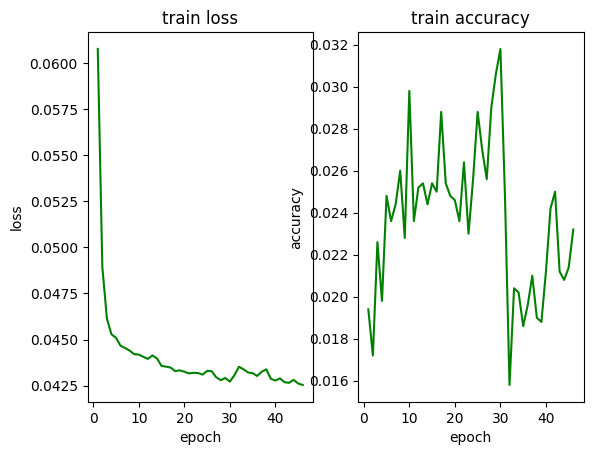

2023-04-18 15:13:20   epoch:    4 , batch:  550 , avg_batch_acc:0.0234 , avg_batch_loss:0.0426 , lr:0.000100 


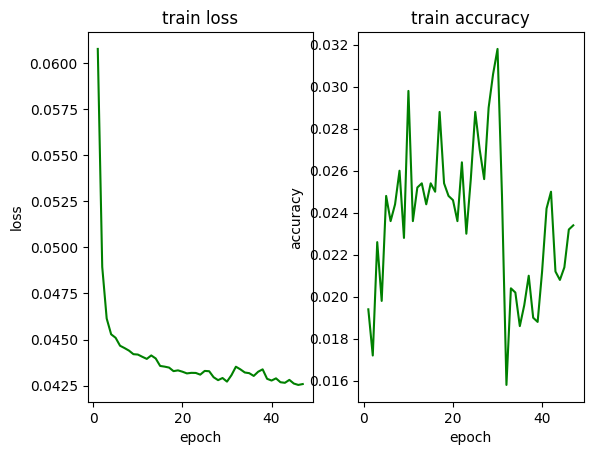

2023-04-18 15:13:37   epoch:    4 , batch:  600 , avg_batch_acc:0.0244 , avg_batch_loss:0.0425 , lr:0.000100 


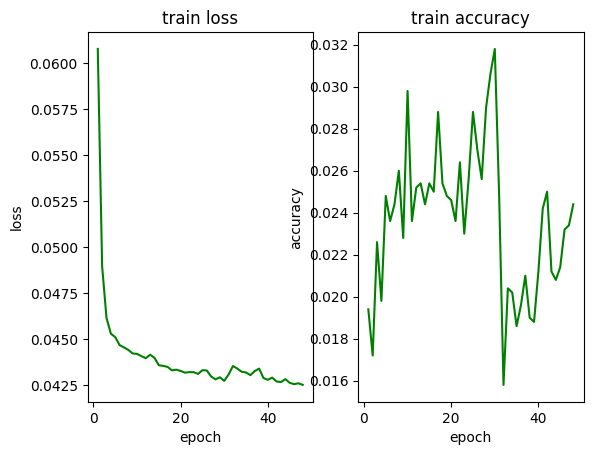

2023-04-18 15:13:48    **********epoch:    4 , avg_epoch_acc:0.0220 , avg_epoch_loss:0.0428 *************
------------test_set_acc:0.0200---------------


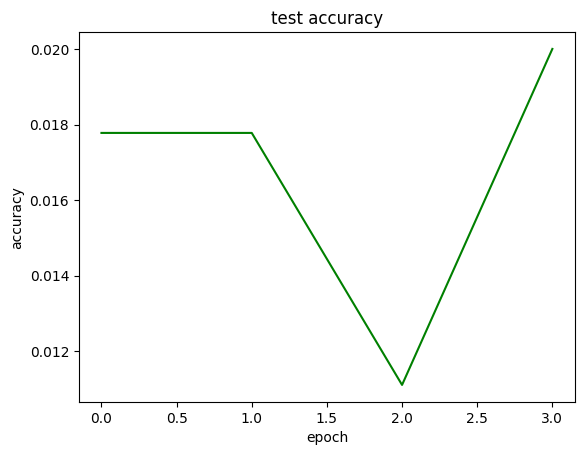

2023-04-18 15:14:05   epoch:    5 , batch:   50 , avg_batch_acc:0.0228 , avg_batch_loss:0.0428 , lr:0.000100 


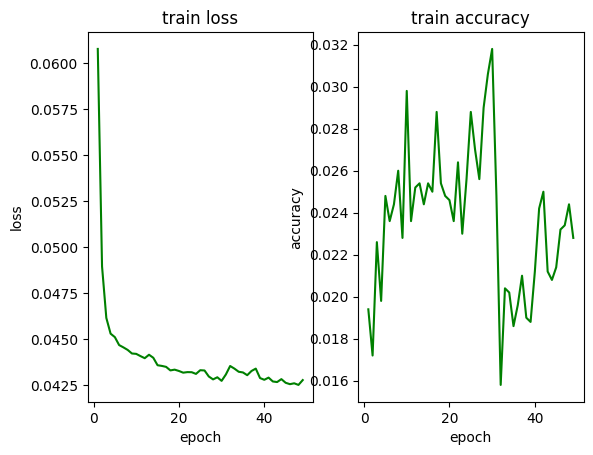

2023-04-18 15:14:22   epoch:    5 , batch:  100 , avg_batch_acc:0.0230 , avg_batch_loss:0.0429 , lr:0.000100 


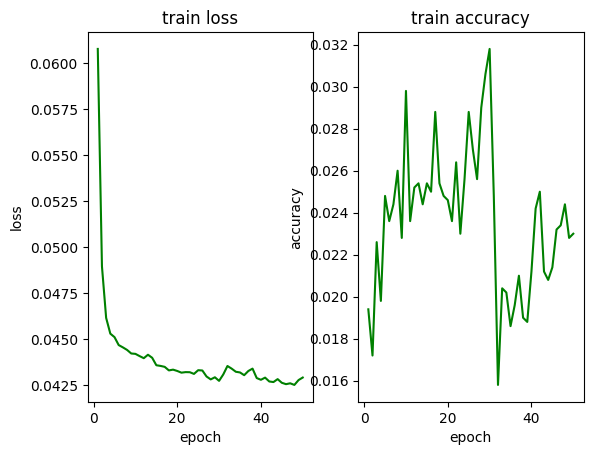

2023-04-18 15:14:39   epoch:    5 , batch:  150 , avg_batch_acc:0.0220 , avg_batch_loss:0.0425 , lr:0.000100 


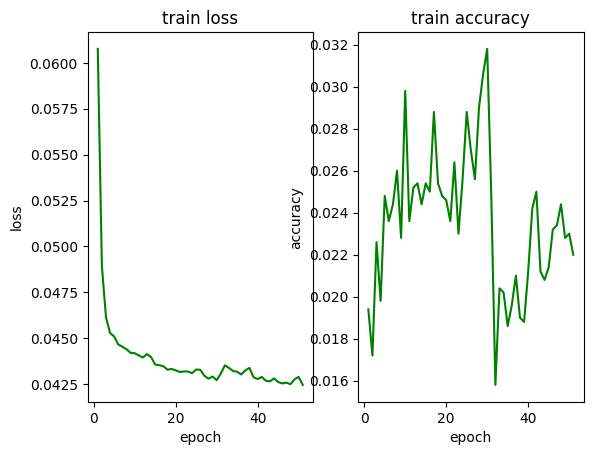

2023-04-18 15:14:56   epoch:    5 , batch:  200 , avg_batch_acc:0.0250 , avg_batch_loss:0.0423 , lr:0.000100 


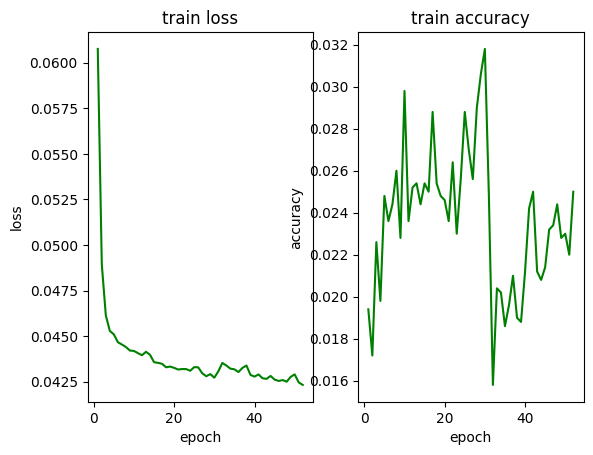

2023-04-18 15:15:13   epoch:    5 , batch:  250 , avg_batch_acc:0.0258 , avg_batch_loss:0.0424 , lr:0.000100 


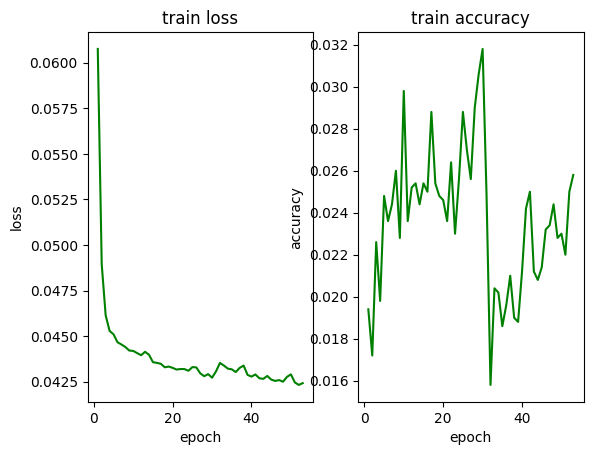

2023-04-18 15:15:30   epoch:    5 , batch:  300 , avg_batch_acc:0.0280 , avg_batch_loss:0.0423 , lr:0.000100 


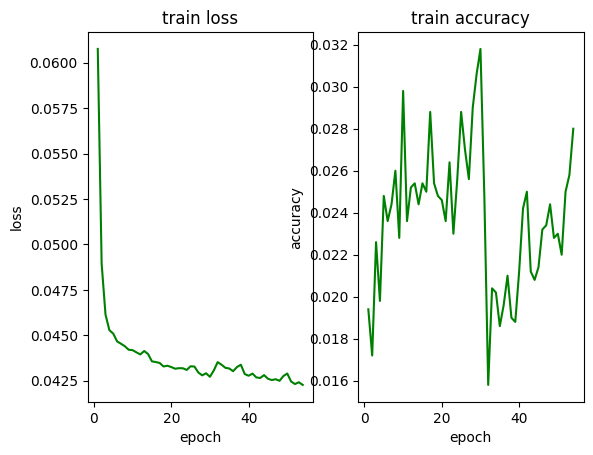

2023-04-18 15:15:47   epoch:    5 , batch:  350 , avg_batch_acc:0.0252 , avg_batch_loss:0.0422 , lr:0.000100 


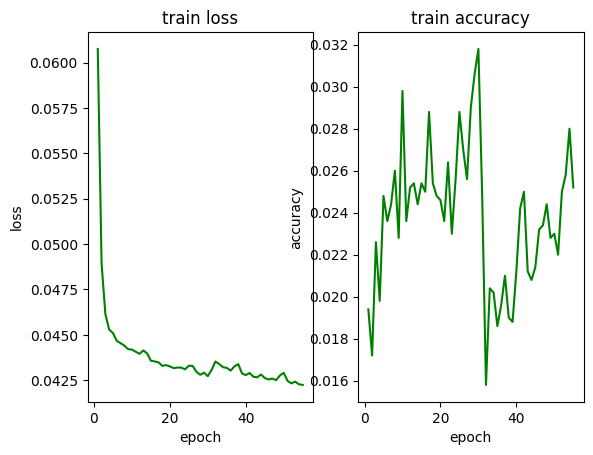

2023-04-18 15:16:04   epoch:    5 , batch:  400 , avg_batch_acc:0.0240 , avg_batch_loss:0.0424 , lr:0.000100 


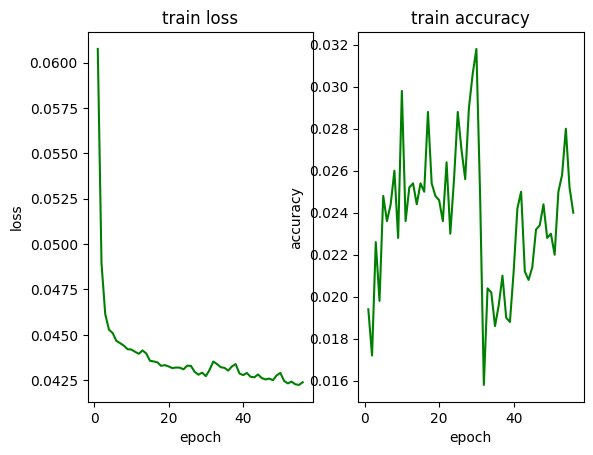

2023-04-18 15:16:21   epoch:    5 , batch:  450 , avg_batch_acc:0.0284 , avg_batch_loss:0.0422 , lr:0.000100 


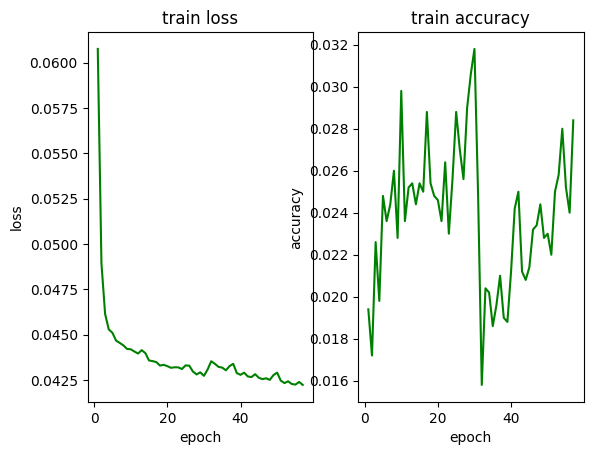

2023-04-18 15:16:38   epoch:    5 , batch:  500 , avg_batch_acc:0.0278 , avg_batch_loss:0.0422 , lr:0.000100 


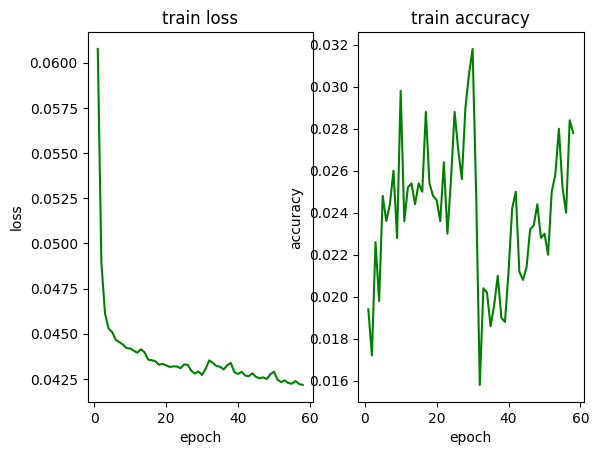

2023-04-18 15:16:54   epoch:    5 , batch:  550 , avg_batch_acc:0.0246 , avg_batch_loss:0.0422 , lr:0.000100 


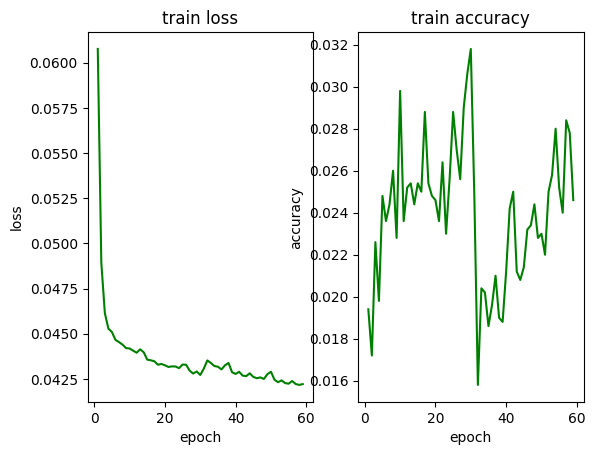

2023-04-18 15:17:12   epoch:    5 , batch:  600 , avg_batch_acc:0.0260 , avg_batch_loss:0.0421 , lr:0.000100 


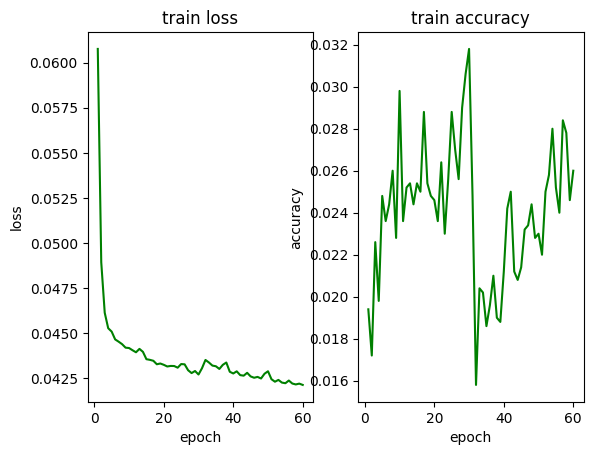

2023-04-18 15:17:24    **********epoch:    5 , avg_epoch_acc:0.0252 , avg_epoch_loss:0.0424 *************
------------test_set_acc:0.0200---------------


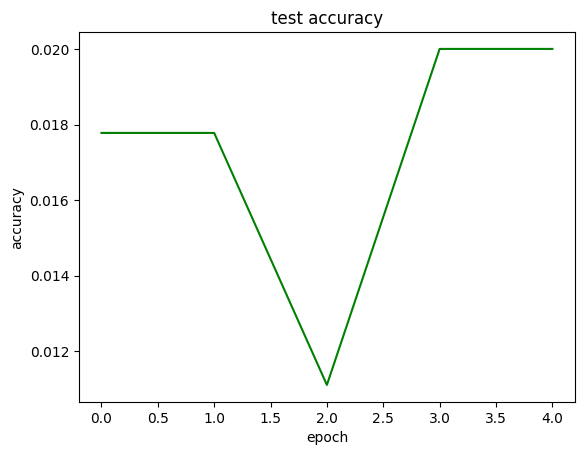

2023-04-18 15:17:41   epoch:    6 , batch:   50 , avg_batch_acc:0.0262 , avg_batch_loss:0.0424 , lr:0.000100 


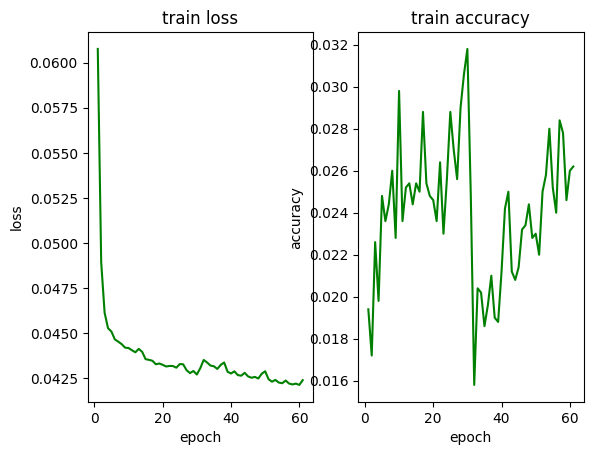

2023-04-18 15:17:58   epoch:    6 , batch:  100 , avg_batch_acc:0.0266 , avg_batch_loss:0.0426 , lr:0.000100 


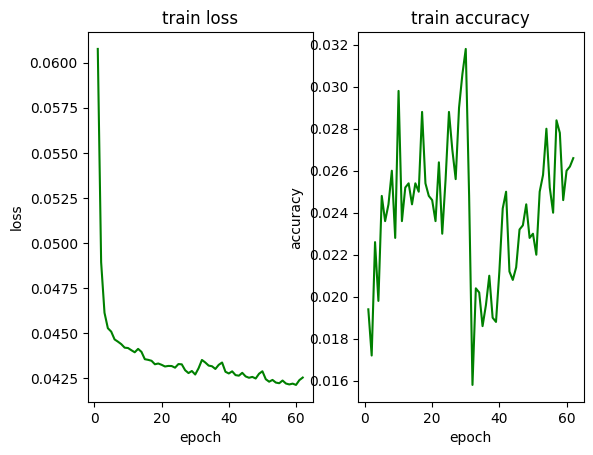

2023-04-18 15:18:16   epoch:    6 , batch:  150 , avg_batch_acc:0.0250 , avg_batch_loss:0.0422 , lr:0.000100 


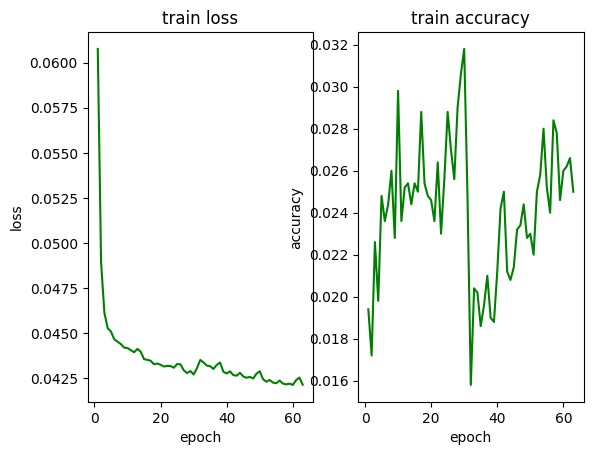

2023-04-18 15:18:33   epoch:    6 , batch:  200 , avg_batch_acc:0.0248 , avg_batch_loss:0.0420 , lr:0.000100 


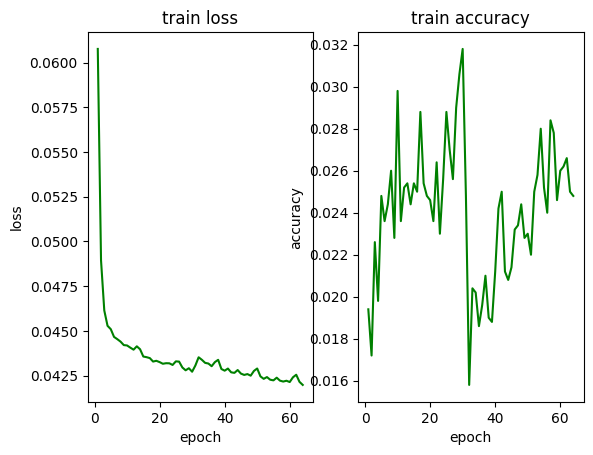

2023-04-18 15:18:50   epoch:    6 , batch:  250 , avg_batch_acc:0.0288 , avg_batch_loss:0.0421 , lr:0.000100 


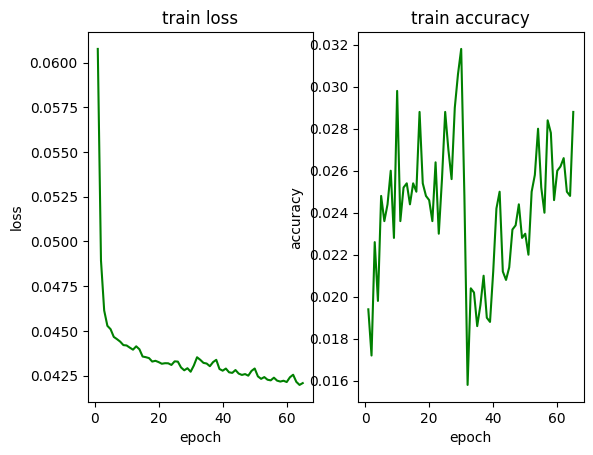

2023-04-18 15:19:08   epoch:    6 , batch:  300 , avg_batch_acc:0.0304 , avg_batch_loss:0.0420 , lr:0.000100 


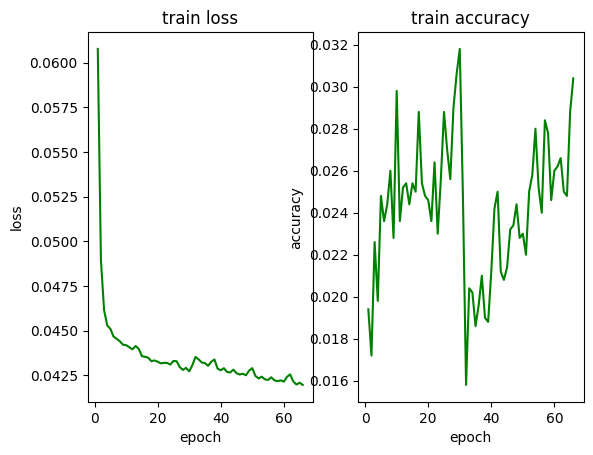

2023-04-18 15:19:25   epoch:    6 , batch:  350 , avg_batch_acc:0.0296 , avg_batch_loss:0.0419 , lr:0.000100 


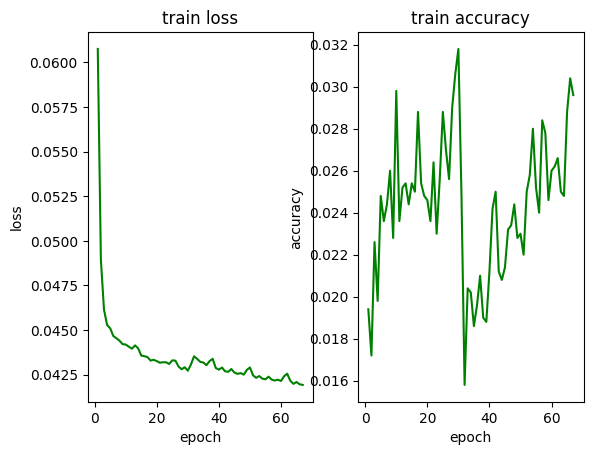

2023-04-18 15:19:42   epoch:    6 , batch:  400 , avg_batch_acc:0.0264 , avg_batch_loss:0.0421 , lr:0.000100 


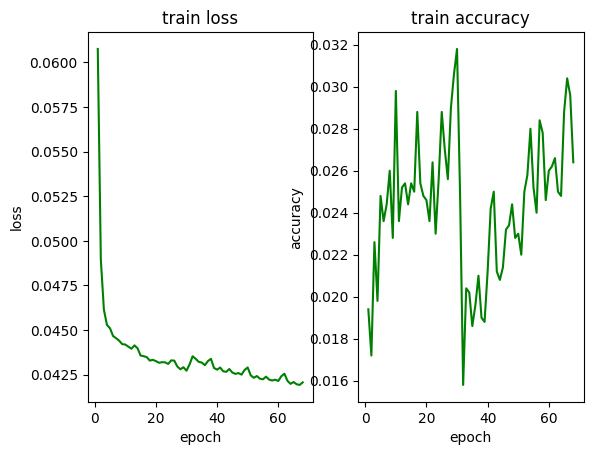

2023-04-18 15:20:00   epoch:    6 , batch:  450 , avg_batch_acc:0.0304 , avg_batch_loss:0.0419 , lr:0.000100 


2023-04-18 15:20:17   epoch:    6 , batch:  500 , avg_batch_acc:0.0308 , avg_batch_loss:0.0419 , lr:0.000100 


2023-04-18 15:20:35   epoch:    6 , batch:  550 , avg_batch_acc:0.0280 , avg_batch_loss:0.0419 , lr:0.000100 


2023-04-18 15:20:52   epoch:    6 , batch:  600 , avg_batch_acc:0.0292 , avg_batch_loss:0.0418 , lr:0.000100 


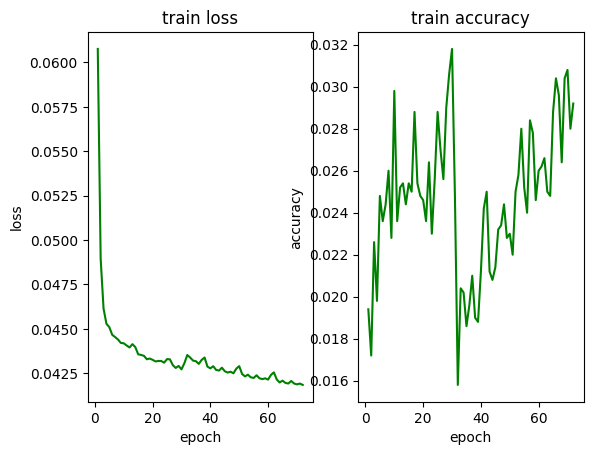

2023-04-18 15:21:04    **********epoch:    6 , avg_epoch_acc:0.0280 , avg_epoch_loss:0.0420 *************
------------test_set_acc:0.0222---------------


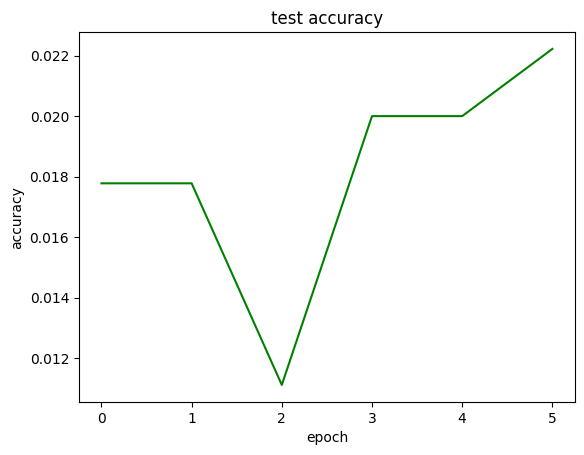

2023-04-18 15:21:21   epoch:    7 , batch:   50 , avg_batch_acc:0.0304 , avg_batch_loss:0.0421 , lr:0.000100 


2023-04-18 15:21:39   epoch:    7 , batch:  100 , avg_batch_acc:0.0290 , avg_batch_loss:0.0423 , lr:0.000100 


2023-04-18 15:21:56   epoch:    7 , batch:  150 , avg_batch_acc:0.0280 , avg_batch_loss:0.0419 , lr:0.000100 


2023-04-18 15:22:14   epoch:    7 , batch:  200 , avg_batch_acc:0.0268 , avg_batch_loss:0.0417 , lr:0.000100 


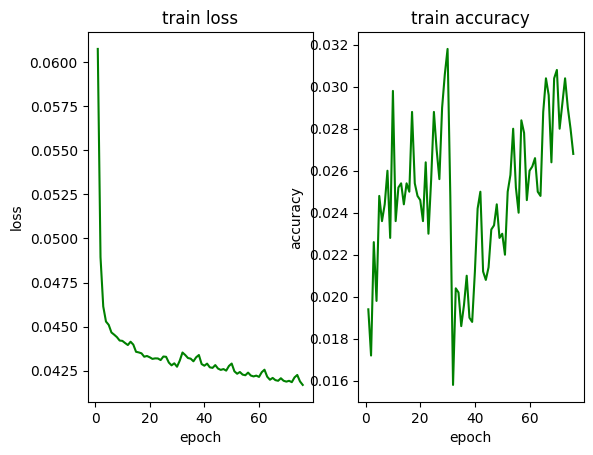

2023-04-18 15:22:31   epoch:    7 , batch:  250 , avg_batch_acc:0.0304 , avg_batch_loss:0.0418 , lr:0.000100 


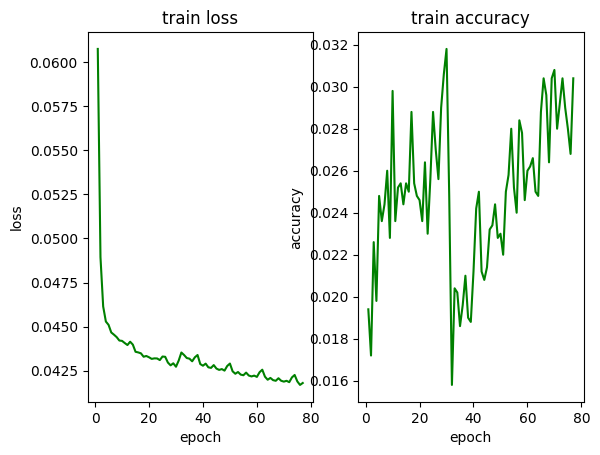

2023-04-18 15:22:49   epoch:    7 , batch:  300 , avg_batch_acc:0.0324 , avg_batch_loss:0.0417 , lr:0.000100 


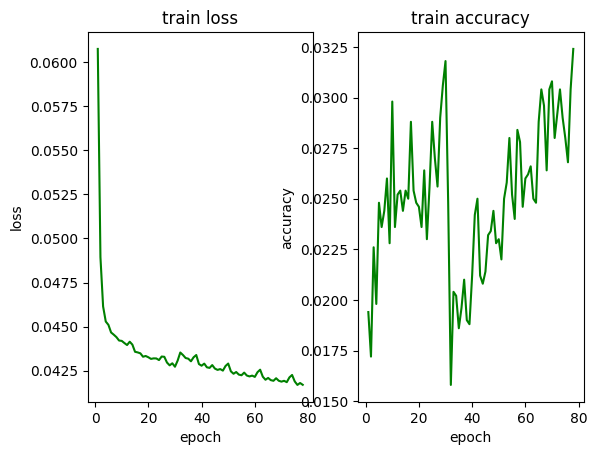

2023-04-18 15:23:06   epoch:    7 , batch:  350 , avg_batch_acc:0.0334 , avg_batch_loss:0.0417 , lr:0.000100 


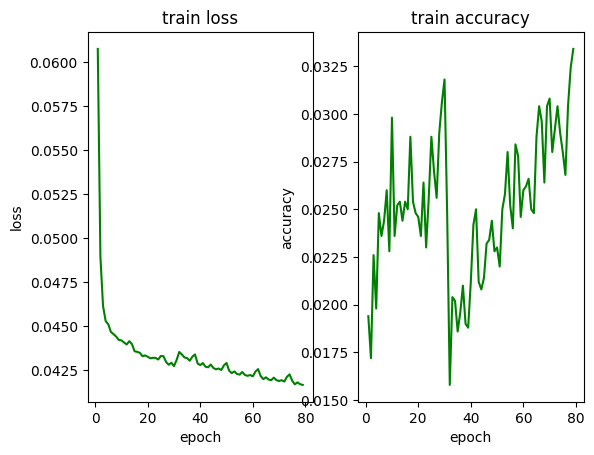

2023-04-18 15:23:24   epoch:    7 , batch:  400 , avg_batch_acc:0.0274 , avg_batch_loss:0.0418 , lr:0.000100 


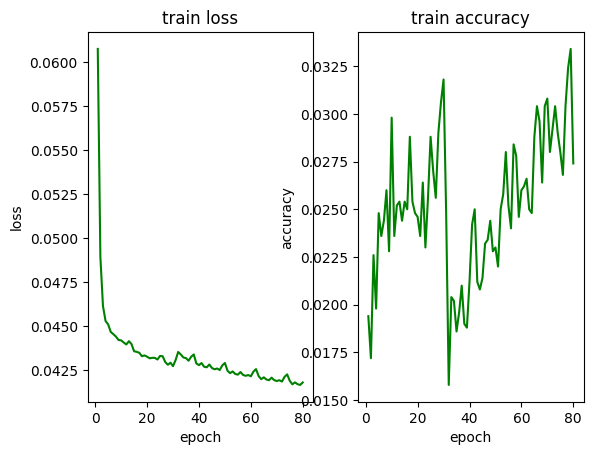

2023-04-18 15:23:41   epoch:    7 , batch:  450 , avg_batch_acc:0.0326 , avg_batch_loss:0.0417 , lr:0.000100 


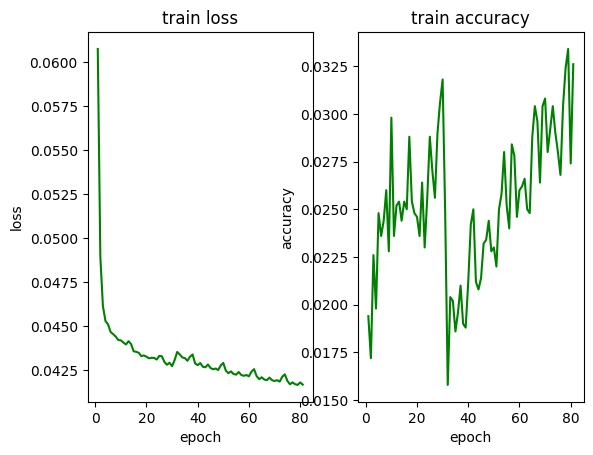

2023-04-18 15:23:59   epoch:    7 , batch:  500 , avg_batch_acc:0.0320 , avg_batch_loss:0.0416 , lr:0.000100 


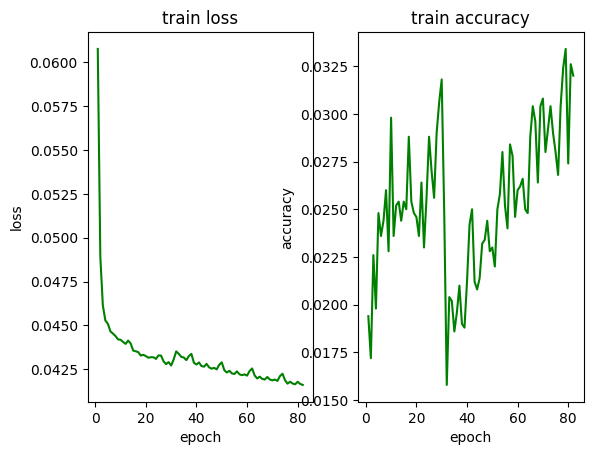

2023-04-18 15:24:16   epoch:    7 , batch:  550 , avg_batch_acc:0.0304 , avg_batch_loss:0.0417 , lr:0.000100 


2023-04-18 15:24:34   epoch:    7 , batch:  600 , avg_batch_acc:0.0328 , avg_batch_loss:0.0416 , lr:0.000100 


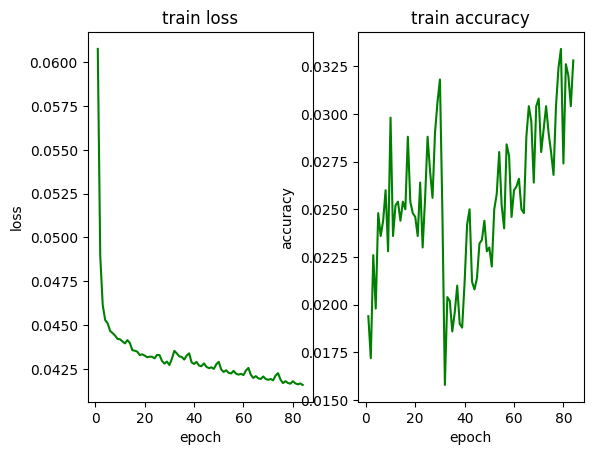

2023-04-18 15:24:45    **********epoch:    7 , avg_epoch_acc:0.0305 , avg_epoch_loss:0.0418 *************
------------test_set_acc:0.0244---------------


2023-04-18 15:25:03   epoch:    8 , batch:   50 , avg_batch_acc:0.0324 , avg_batch_loss:0.0419 , lr:0.000100 


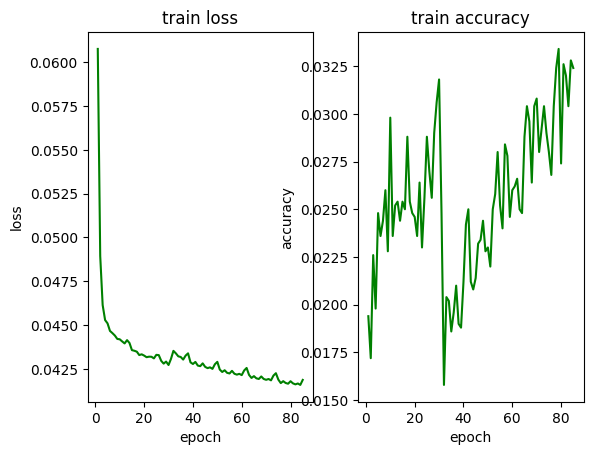

2023-04-18 15:25:21   epoch:    8 , batch:  100 , avg_batch_acc:0.0320 , avg_batch_loss:0.0420 , lr:0.000100 


2023-04-18 15:25:38   epoch:    8 , batch:  150 , avg_batch_acc:0.0300 , avg_batch_loss:0.0416 , lr:0.000100 


2023-04-18 15:25:55   epoch:    8 , batch:  200 , avg_batch_acc:0.0298 , avg_batch_loss:0.0414 , lr:0.000100 


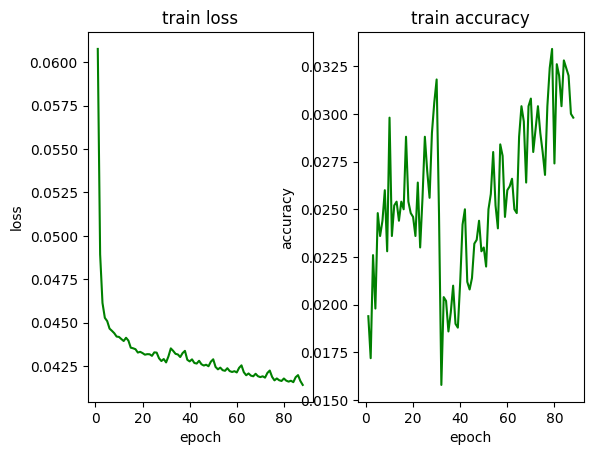

2023-04-18 15:26:12   epoch:    8 , batch:  250 , avg_batch_acc:0.0326 , avg_batch_loss:0.0416 , lr:0.000100 


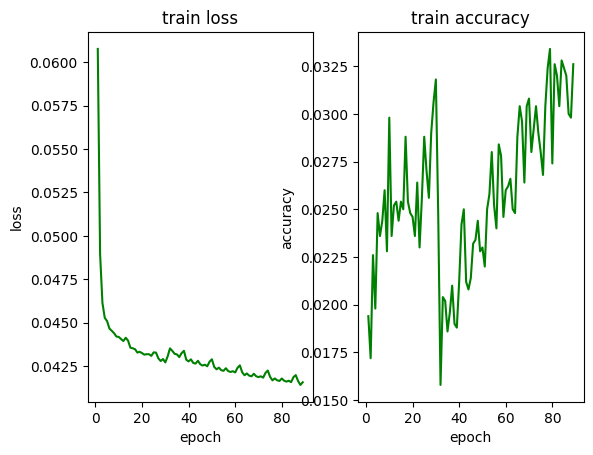

2023-04-18 15:26:29   epoch:    8 , batch:  300 , avg_batch_acc:0.0330 , avg_batch_loss:0.0415 , lr:0.000100 


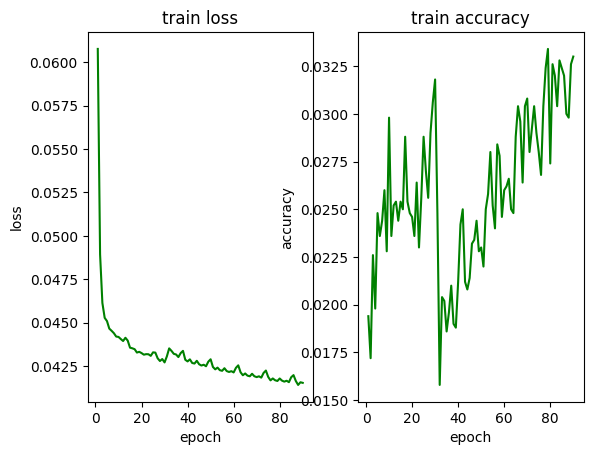

2023-04-18 15:26:46   epoch:    8 , batch:  350 , avg_batch_acc:0.0364 , avg_batch_loss:0.0414 , lr:0.000100 


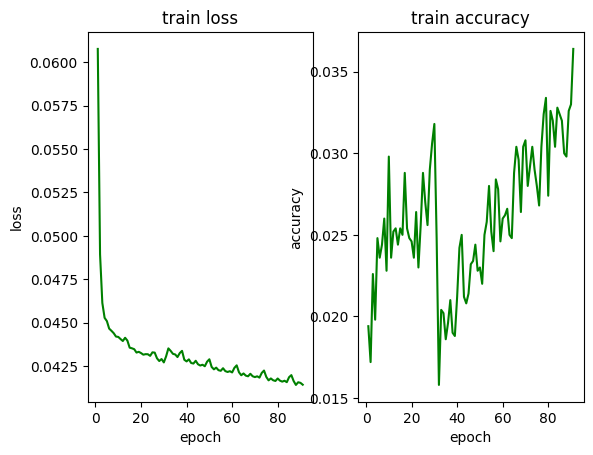

2023-04-18 15:27:03   epoch:    8 , batch:  400 , avg_batch_acc:0.0310 , avg_batch_loss:0.0416 , lr:0.000100 


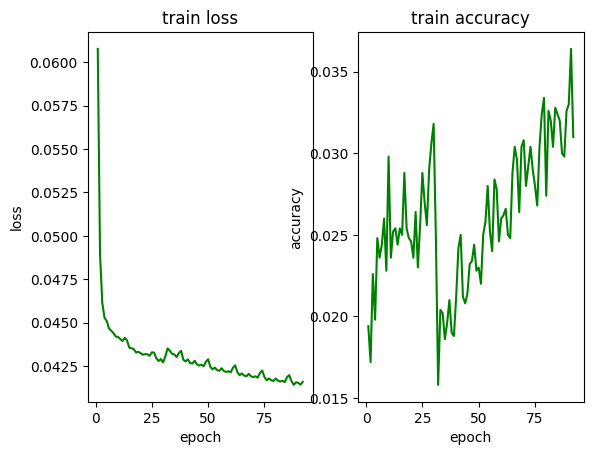

2023-04-18 15:27:20   epoch:    8 , batch:  450 , avg_batch_acc:0.0344 , avg_batch_loss:0.0415 , lr:0.000100 


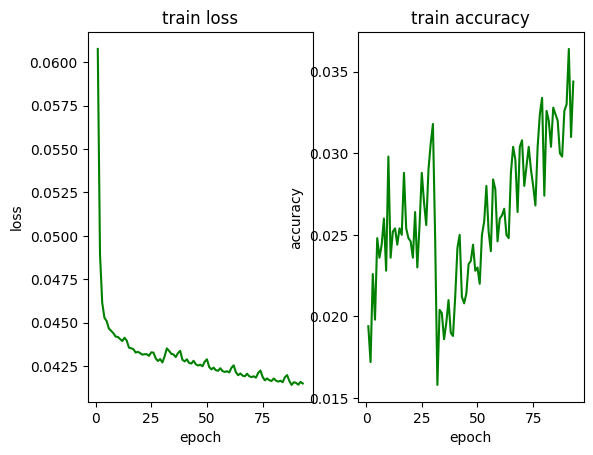

2023-04-18 15:27:37   epoch:    8 , batch:  500 , avg_batch_acc:0.0346 , avg_batch_loss:0.0415 , lr:0.000100 


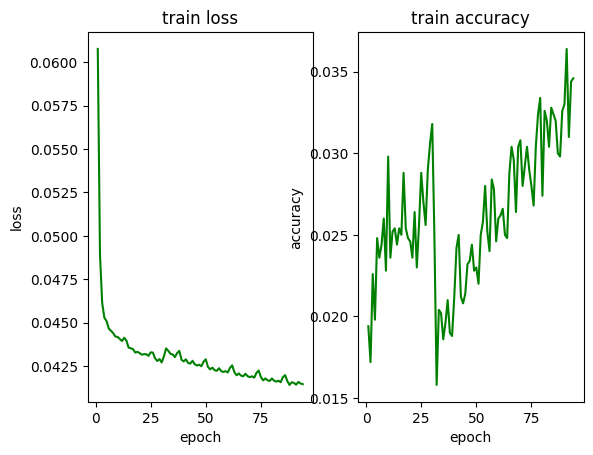

2023-04-18 15:27:54   epoch:    8 , batch:  550 , avg_batch_acc:0.0340 , avg_batch_loss:0.0415 , lr:0.000100 


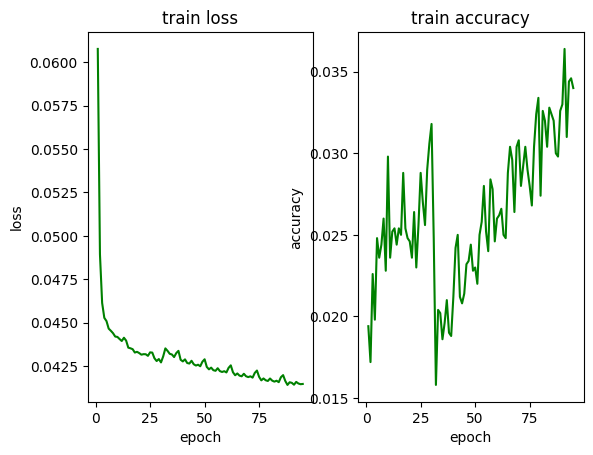

2023-04-18 15:28:11   epoch:    8 , batch:  600 , avg_batch_acc:0.0344 , avg_batch_loss:0.0414 , lr:0.000100 


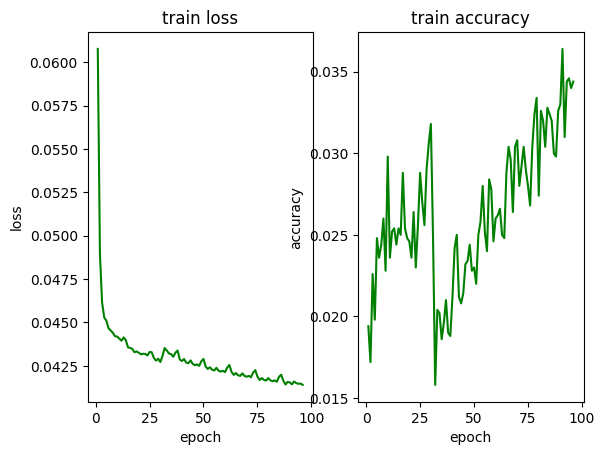

2023-04-18 15:28:22    **********epoch:    8 , avg_epoch_acc:0.0330 , avg_epoch_loss:0.0416 *************
------------test_set_acc:0.0244---------------


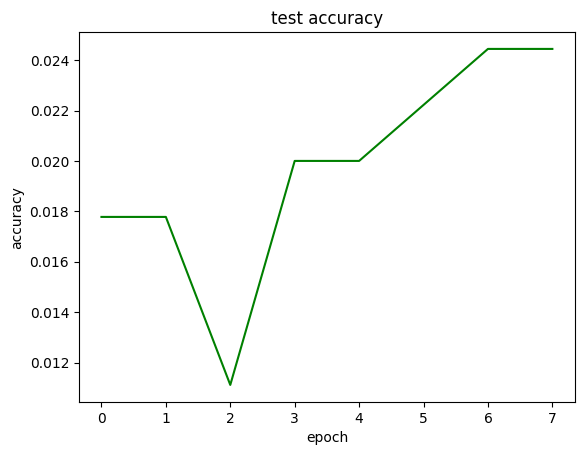

2023-04-18 15:28:39   epoch:    9 , batch:   50 , avg_batch_acc:0.0320 , avg_batch_loss:0.0417 , lr:0.000100 


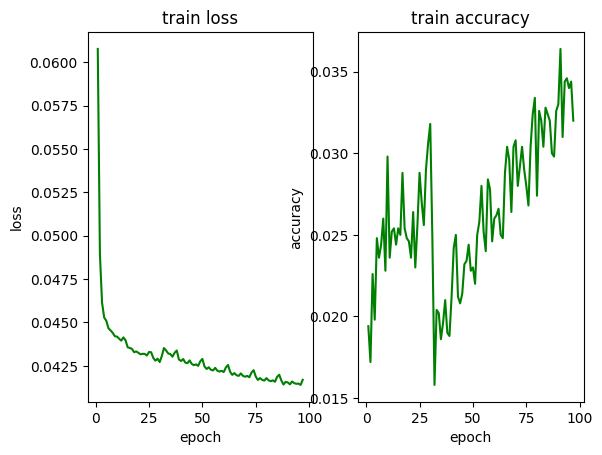

2023-04-18 15:28:56   epoch:    9 , batch:  100 , avg_batch_acc:0.0344 , avg_batch_loss:0.0418 , lr:0.000100 


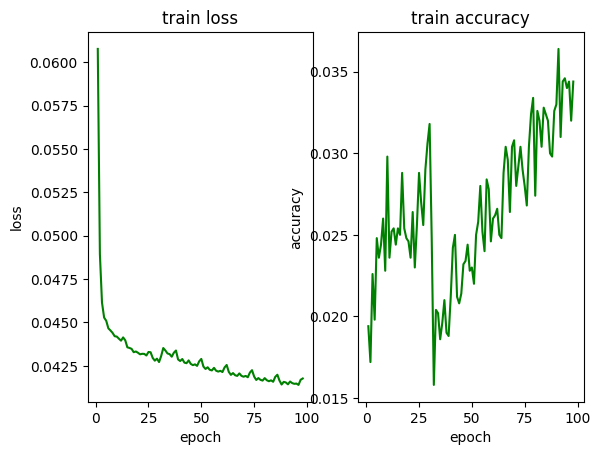

2023-04-18 15:29:14   epoch:    9 , batch:  150 , avg_batch_acc:0.0304 , avg_batch_loss:0.0415 , lr:0.000100 


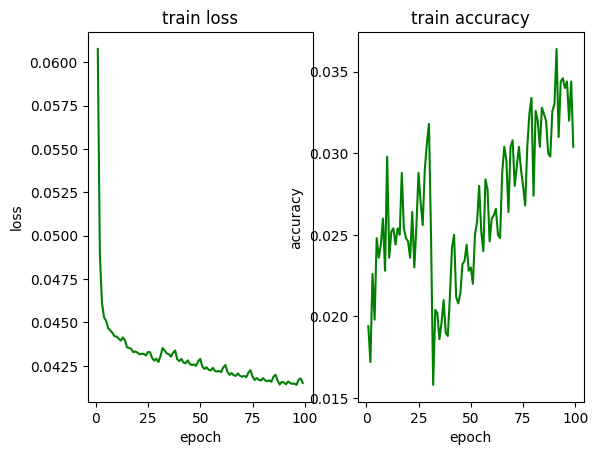

2023-04-18 15:29:31   epoch:    9 , batch:  200 , avg_batch_acc:0.0302 , avg_batch_loss:0.0413 , lr:0.000100 


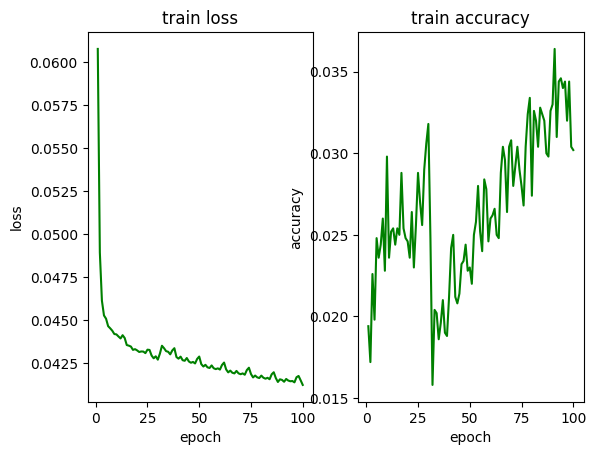

2023-04-18 15:29:48   epoch:    9 , batch:  250 , avg_batch_acc:0.0344 , avg_batch_loss:0.0414 , lr:0.000100 


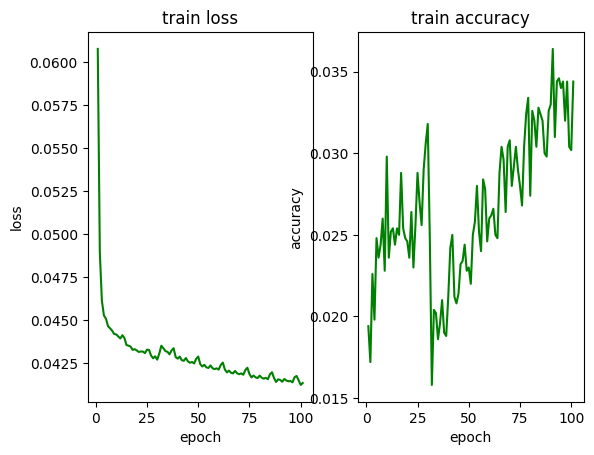

2023-04-18 15:30:05   epoch:    9 , batch:  300 , avg_batch_acc:0.0344 , avg_batch_loss:0.0413 , lr:0.000100 


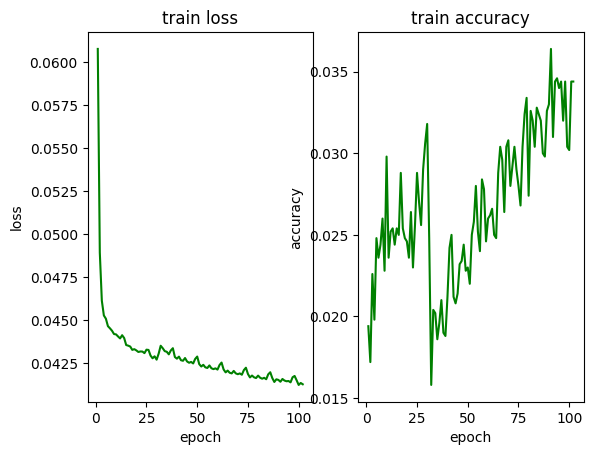

2023-04-18 15:30:21   epoch:    9 , batch:  350 , avg_batch_acc:0.0388 , avg_batch_loss:0.0412 , lr:0.000100 


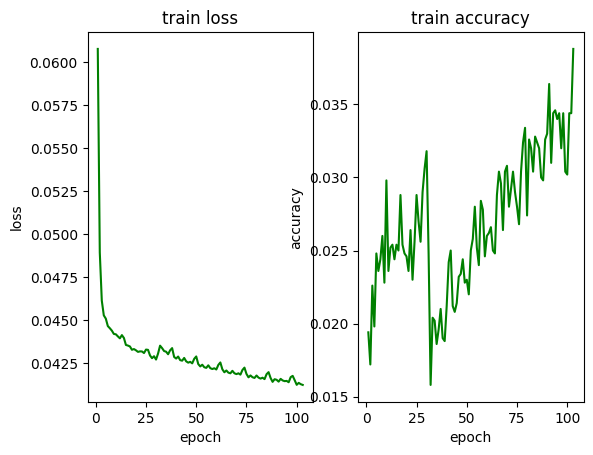

2023-04-18 15:30:38   epoch:    9 , batch:  400 , avg_batch_acc:0.0326 , avg_batch_loss:0.0414 , lr:0.000100 


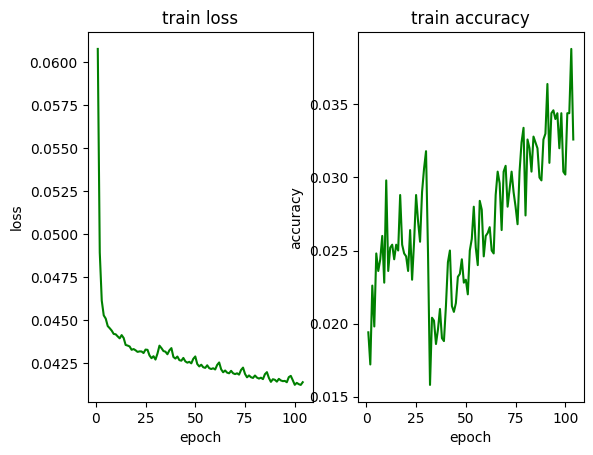

2023-04-18 15:30:55   epoch:    9 , batch:  450 , avg_batch_acc:0.0364 , avg_batch_loss:0.0413 , lr:0.000100 


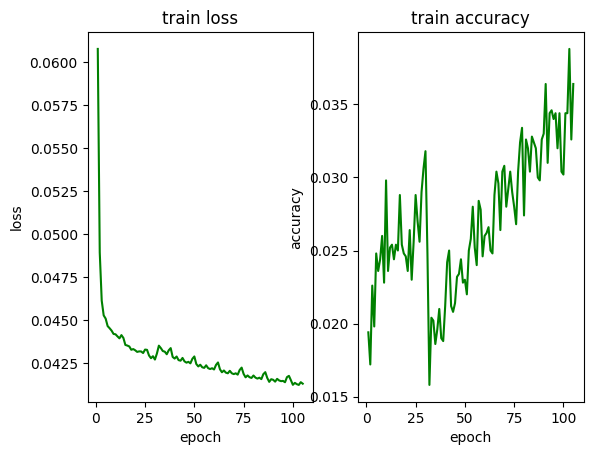

2023-04-18 15:31:12   epoch:    9 , batch:  500 , avg_batch_acc:0.0364 , avg_batch_loss:0.0413 , lr:0.000100 


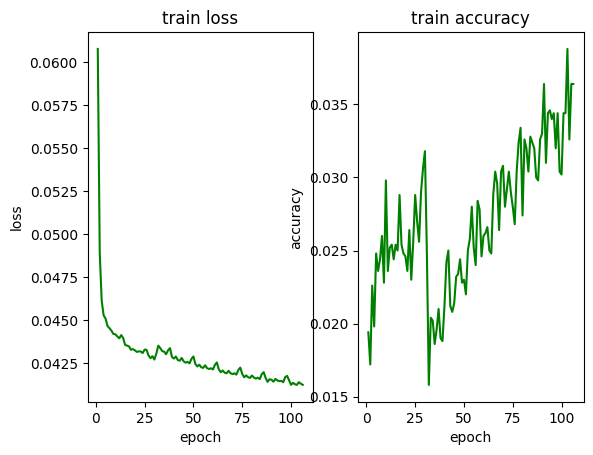

2023-04-18 15:31:29   epoch:    9 , batch:  550 , avg_batch_acc:0.0362 , avg_batch_loss:0.0413 , lr:0.000100 


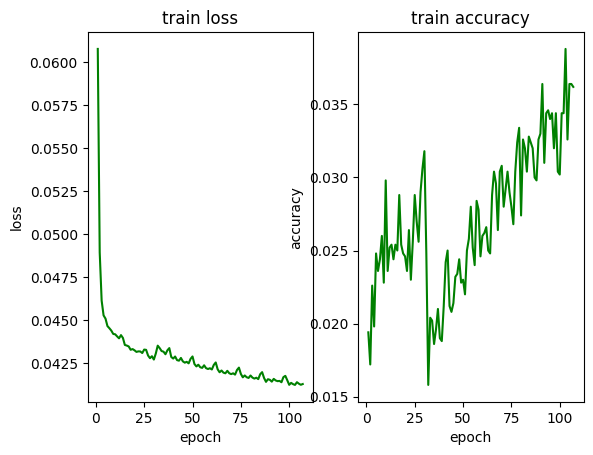

2023-04-18 15:31:46   epoch:    9 , batch:  600 , avg_batch_acc:0.0330 , avg_batch_loss:0.0413 , lr:0.000100 


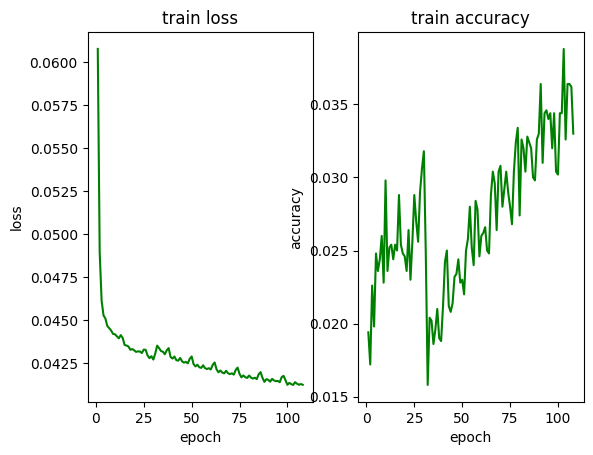

2023-04-18 15:31:57    **********epoch:    9 , avg_epoch_acc:0.0342 , avg_epoch_loss:0.0414 *************
------------test_set_acc:0.0200---------------


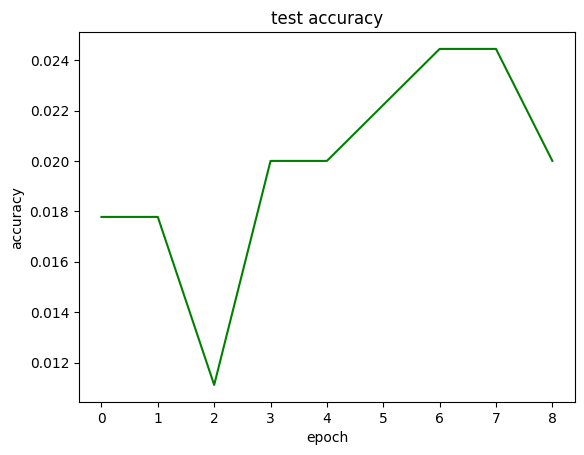

2023-04-18 15:32:14   epoch:   10 , batch:   50 , avg_batch_acc:0.0328 , avg_batch_loss:0.0415 , lr:0.000100 


2023-04-18 15:32:31   epoch:   10 , batch:  100 , avg_batch_acc:0.0340 , avg_batch_loss:0.0416 , lr:0.000100 


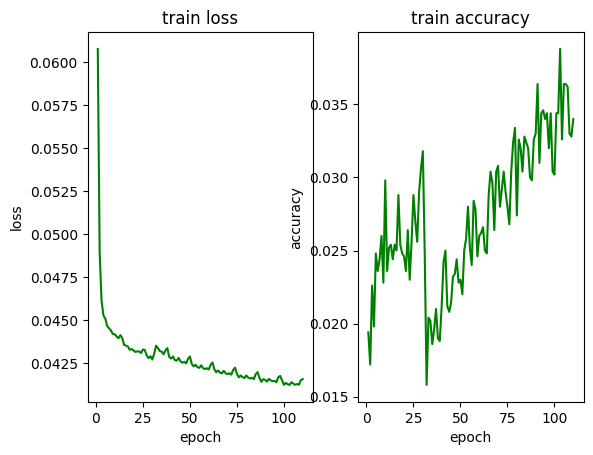

2023-04-18 15:32:48   epoch:   10 , batch:  150 , avg_batch_acc:0.0296 , avg_batch_loss:0.0415 , lr:0.000100 


2023-04-18 15:33:05   epoch:   10 , batch:  200 , avg_batch_acc:0.0254 , avg_batch_loss:0.0414 , lr:0.000100 


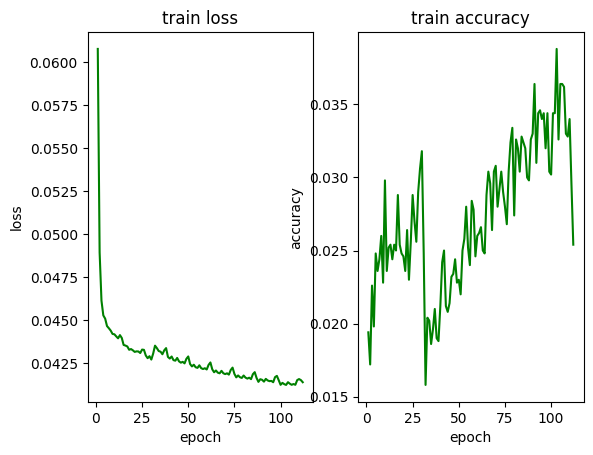

2023-04-18 15:33:22   epoch:   10 , batch:  250 , avg_batch_acc:0.0310 , avg_batch_loss:0.0414 , lr:0.000100 


2023-04-18 15:33:39   epoch:   10 , batch:  300 , avg_batch_acc:0.0358 , avg_batch_loss:0.0412 , lr:0.000100 


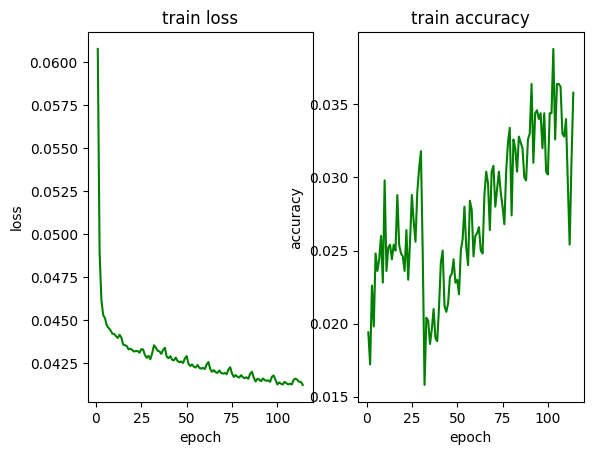

2023-04-18 15:33:56   epoch:   10 , batch:  350 , avg_batch_acc:0.0370 , avg_batch_loss:0.0412 , lr:0.000100 


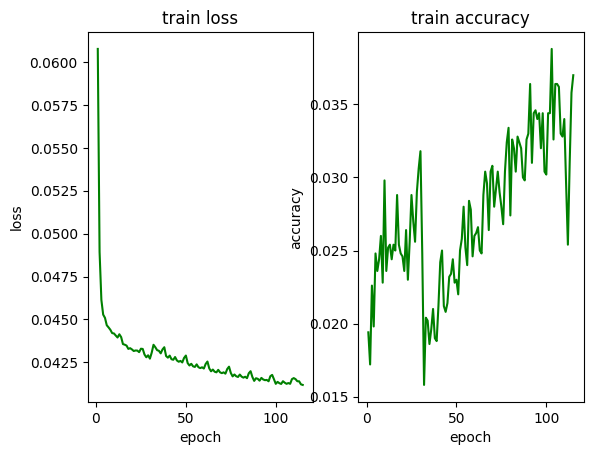

2023-04-18 15:34:13   epoch:   10 , batch:  400 , avg_batch_acc:0.0326 , avg_batch_loss:0.0414 , lr:0.000100 


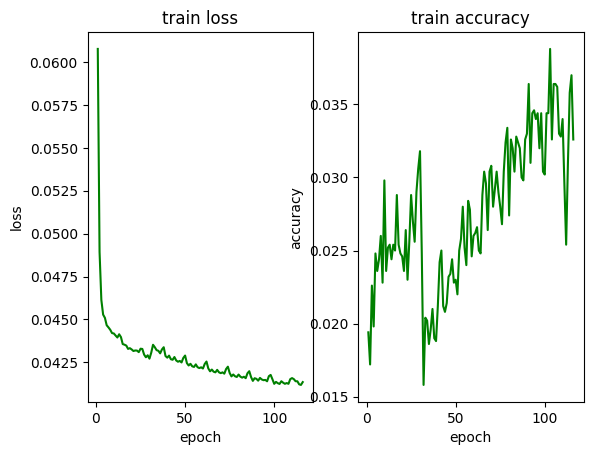

2023-04-18 15:34:30   epoch:   10 , batch:  450 , avg_batch_acc:0.0320 , avg_batch_loss:0.0413 , lr:0.000100 


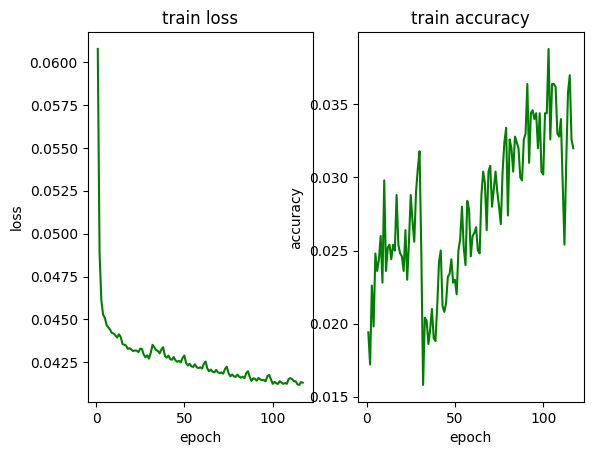

2023-04-18 15:34:46   epoch:   10 , batch:  500 , avg_batch_acc:0.0314 , avg_batch_loss:0.0413 , lr:0.000100 


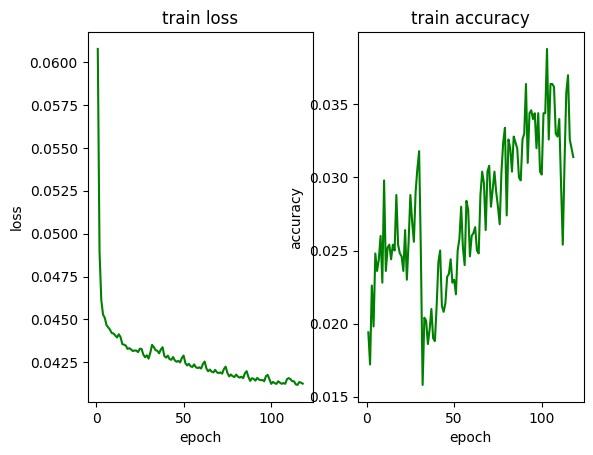

2023-04-18 15:35:03   epoch:   10 , batch:  550 , avg_batch_acc:0.0328 , avg_batch_loss:0.0413 , lr:0.000100 


2023-04-18 15:35:20   epoch:   10 , batch:  600 , avg_batch_acc:0.0318 , avg_batch_loss:0.0412 , lr:0.000100 


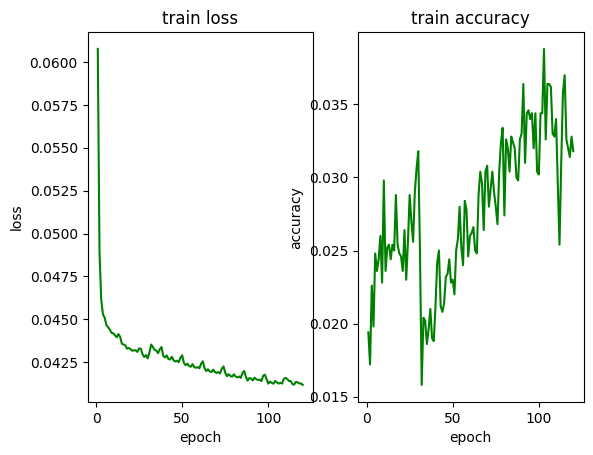

2023-04-18 15:35:31    **********epoch:   10 , avg_epoch_acc:0.0323 , avg_epoch_loss:0.0413 *************
------------test_set_acc:0.0289---------------


In [23]:
for E in range(epoch):
    batch_loss = 0
    batch_acc = 0

    epoch_loss = 0
    epoch_acc = 0
    #for i in range(10):
    for i in range(traindata.shape[0] // batch_size):
    
        #img = train_images[i*batch_size:(i+1)*batch_size].reshape(batch_size, 3, 28, 28)
        img = traindata[i*batch_size:(i+1)*batch_size]
        img = normalization.normalization(img)
        #label = train_labels[i*batch_size:(i+1)*batch_size]
        label = traindata_y[i*batch_size:(i+1)*batch_size]
        loss, prediction = net.forward(img, label, is_train=True)   # 训练阶段

        epoch_loss += loss
        batch_loss += loss
        for j in range(prediction.shape[0]):
            if np.argmax(prediction[j]) == label[j]:
                epoch_acc += 1
                batch_acc += 1

        net.backward(learning_rate)

        if (i+1)%50 == 0:
            print(time.strftime("%Y-%m-%d %H:%M:%S") +
                  "   epoch:%5d , batch:%5d , avg_batch_acc:%.4f , avg_batch_loss:%.4f , lr:%f "
                  % (E+1, i+1, batch_acc/(batch_size*50), batch_loss/(batch_size*50), learning_rate))
            # 绘制loss和acc变化曲线
            plt.figure(1)
            iterations_num += 1
            plt.clf()
            ax.append(iterations_num)
            ay_loss.append(batch_loss/(batch_size*50))
            ay_acc.append(batch_acc/(batch_size*50))
            plt.subplot(1, 2, 1)
            plt.title('train loss')  # 添加子标题
            plt.xlabel('epoch', fontsize=10)  # 添加轴标签
            plt.ylabel('loss', fontsize=10)
            plt.plot(ax, ay_loss, 'g-')

            plt.subplot(1, 2, 2)
            plt.title('train accuracy')  # 添加子标题
            plt.xlabel('epoch', fontsize=10)  # 添加轴标签
            plt.ylabel('accuracy', fontsize=10)
            plt.plot(ax, ay_acc, 'g-')
            plt.pause(0.4)  # 设置暂停时间，太快图表无法正常显示

            batch_loss = 0
            batch_acc = 0



    print(time.strftime("%Y-%m-%d %H:%M:%S") +
          "    **********epoch:%5d , avg_epoch_acc:%.4f , avg_epoch_loss:%.4f *************"
          % (E+1, epoch_acc/traindata.shape[0], epoch_loss/traindata.shape[0]))
    # 在test set上进行测试
    test_acc = 0
    for k in range(testdata.shape[0] // test_batch):
        img = testdata[k*test_batch:(k+1)*test_batch]
        img = normalization.normalization(img)
        label = testdata_y[k*test_batch:(k+1)*test_batch]
        _, prediction = net.forward(img, label, is_train=False)   # 测试阶段

        for j in range(prediction.shape[0]):
            if np.argmax(prediction[j]) == label[j]:
                test_acc += 1

    print("------------test_set_acc:%.4f---------------" % (test_acc / testdata.shape[0]))
    plt.figure(2)
    plt.clf()
    testx.append(E)
    testy_acc.append(test_acc / testdata.shape[0])
    plt.subplot()
    plt.title('test accuracy')  # 添加子标题
    plt.xlabel('epoch', fontsize=10)  # 添加轴标签
    plt.ylabel('accuracy', fontsize=10)
    plt.plot(testx, testy_acc, 'g-')
    plt.pause(0.4)  # 设置暂停时间，太快图表无法正常显示


plt.ioff()       # 关闭画图的窗口，即关闭交互模式
plt.show()       # 显示图片，防止闪退


In [ ]:
img = testdata
img = normalization.normalization(img)
label = testdata_y
_, test_prediction = net.forward(img, label, is_train=False)   # 测试阶段


img = valdata
img = normalization.normalization(img)
label = valdata_y
_, val_prediction = net.forward(img, label, is_train=False)   # 测试阶段


np.save("model_m_testout.npy",test_prediction)
np.save("model_m_valout.npy",val_prediction)

In [7]:
test_prediction = np.load("model_m_testout.npy")
val_prediction = np.load("model_m_valout.npy")

In [8]:
test_acc = 0
for j in range(test_prediction.shape[0]):
    if np.argmax(test_prediction[j]) == testdata_y[j]:
        test_acc += 1
print("test_acc:",test_acc/450)

val_acc = 0
for j in range(val_prediction.shape[0]):
    if np.argmax(val_prediction[j]) == valdata_y[j]:
        val_acc += 1
print("val_acc",val_acc/450)

test_acc: 0.028888888888888888
val_acc 0.03333333333333333
